In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *


## 1. Background Subtraction

In [11]:
Raw_Datacube = Read_Raw_Datacube("/home/qliu/data/2307027p_old.fits",name="A2465C")
Raw_Datacube.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
NAXIS3  =                  207                                                  
EXTEND  =                    T                                                  
DATE    = '2018-12-05'         / Creation date                                  
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectrum Cube' / Type of file                             
OBSERVAT= 'CFHT    '           / Observatory name                               
TELESCOP= 'CFHT 3.6m'          / Hawaii Big Island, Mauna Kea                   
INSTRUME= 'SITELLE '        

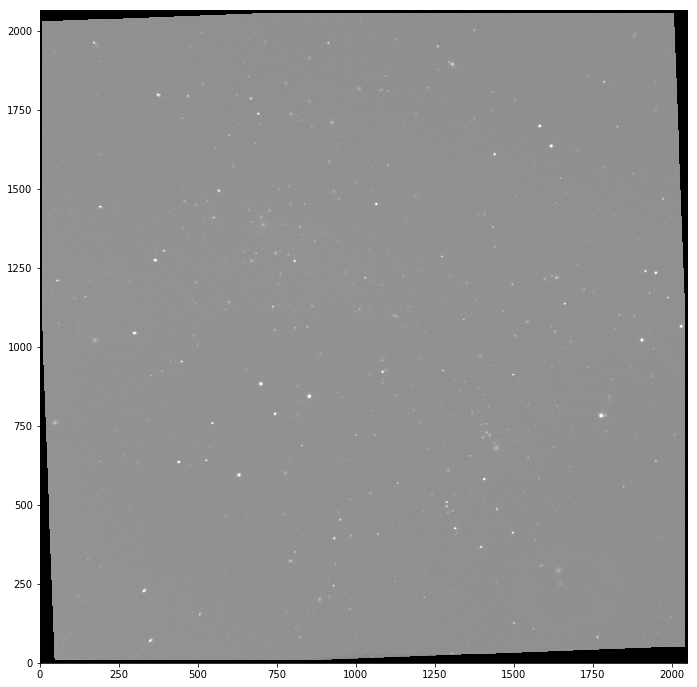

In [12]:
Raw_Datacube.display(Raw_Datacube.raw_stack_field, a=0.01,vmax=100)

In [4]:
Raw_Datacube.save_mask_edge(save_path='/home/qliu/data/')

In [5]:
Raw_Datacube.remove_background(save_path='./A2465C/fig/bkg/', plot=False)

Removing background...Frame: 10
Removing background...Frame: 20
Removing background...Frame: 30
Removing background...Frame: 40
Removing background...Frame: 50
Removing background...Frame: 60
Removing background...Frame: 70
Removing background...Frame: 80
Removing background...Frame: 90


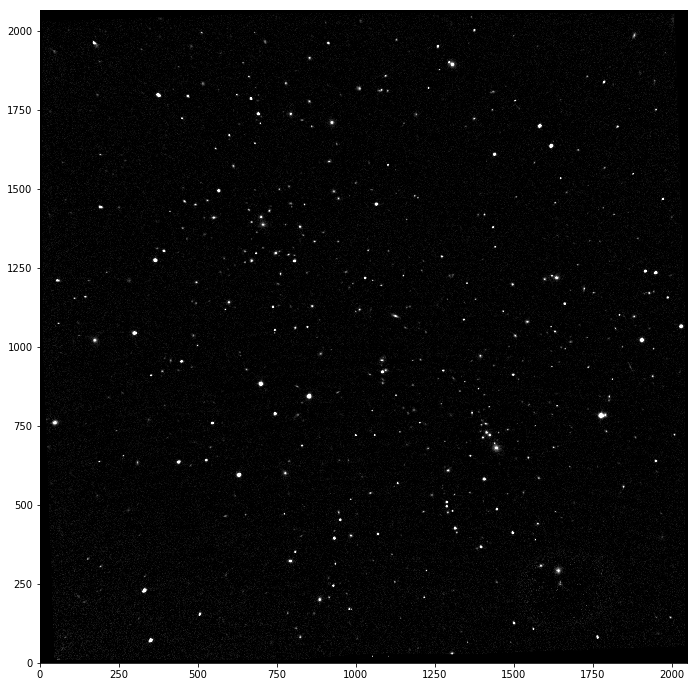

In [6]:
Raw_Datacube.display(Raw_Datacube.stack_field)

In [7]:
Raw_Datacube.remove_fringe(skip_frames=range(20,75), save_path='./A2465C/fig/bkg/', plot=False)

Removing fringe...Frame: 10
Removing fringe...Frame: 20
Removing fringe...Frame: 30
Removing fringe...Frame: 40
Removing fringe...Frame: 50
Removing fringe...Frame: 60
Removing fringe...Frame: 70
Removing fringe...Frame: 80
Removing fringe...Frame: 90


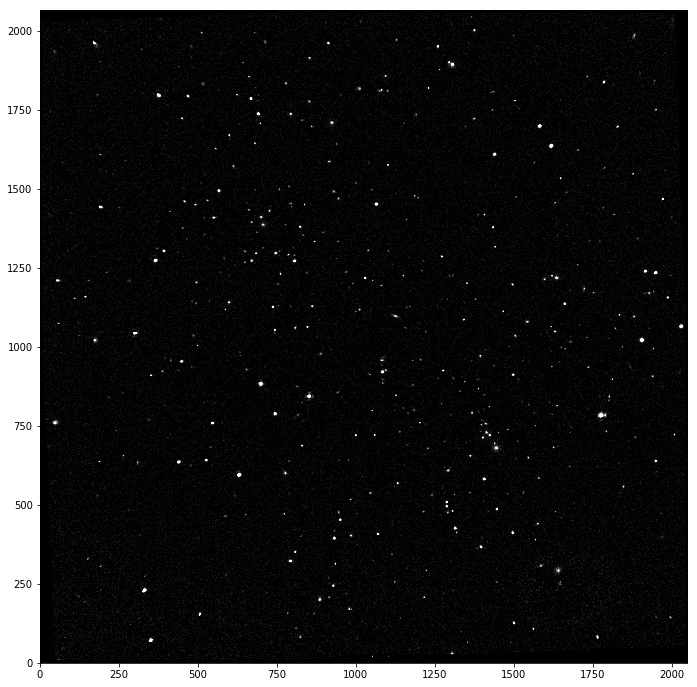

In [12]:
Raw_Datacube.display(Raw_Datacube.stack_field)

In [26]:
Raw_Datacube.save_fits(save_path='/home/qliu/data/')

Saving background & fringe subtracted datacube and stacked field...


In [ ]:
# Weightmap for SE if mask is needed
Raw_Datacube.save_weight_map("/home/qliu/Desktop/Cluster/A2465C/A2465C.reg", weight=0.01, 
                save_path = '/home/qliu/Desktop/Cluster/A2465C')
Raw_Datacube.display(Raw_Datacube.mymask,vmax=None)

## 2. Seeing Calculation

In [30]:
Datacube = Read_Datacube("/home/qliu/data/A2465C_cube.fits",z0=0.245,name="A2465C",
                         SE_catalog="./A2465C/SE/A2465C_run1.cat")

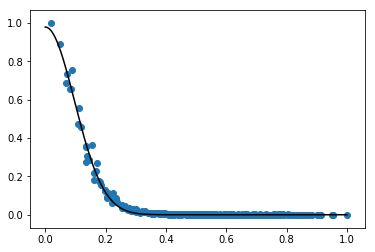

1.0775073385635616


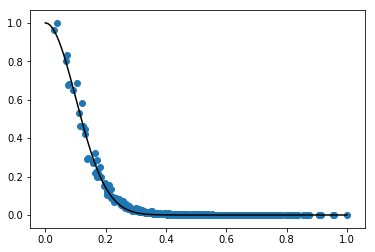

1.1703704519429072


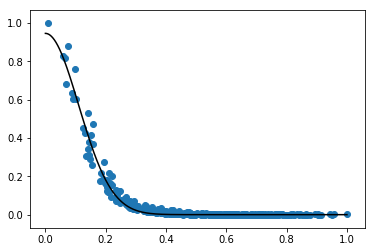

1.2439356965168409


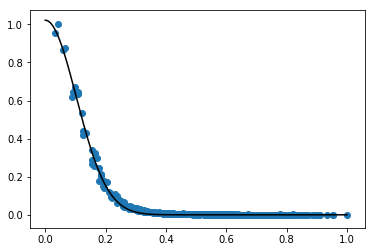

1.1455492458277479


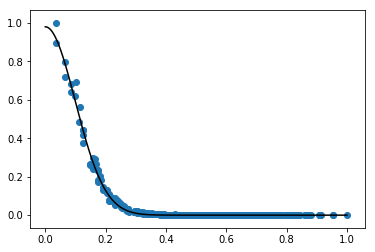

1.134539465449362


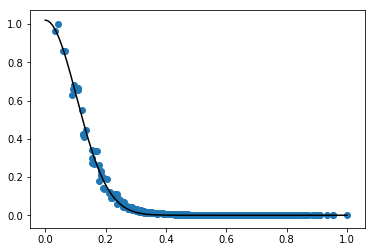

1.158770295012295


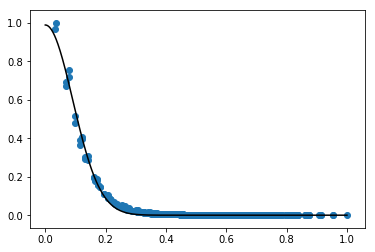

1.042971688754049


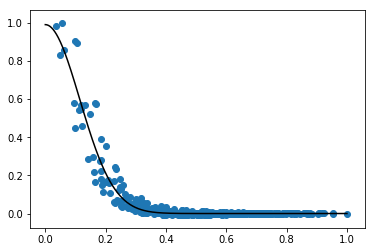

1.2644914600772412


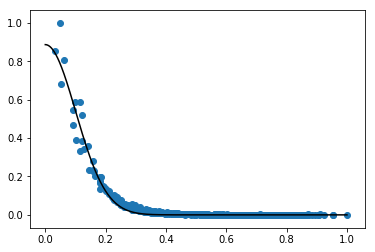

1.1361256112926845


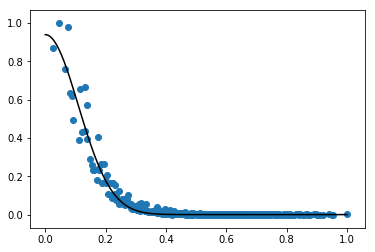

1.2015010864938465


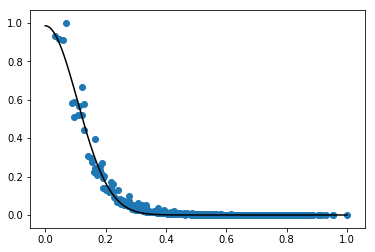

1.1740183675320208


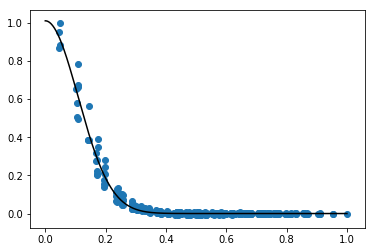

1.2256268154474397


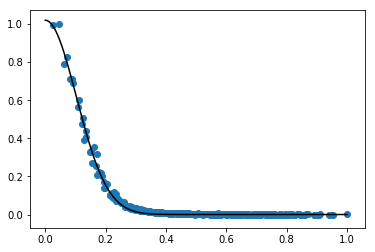

1.1478087620833495


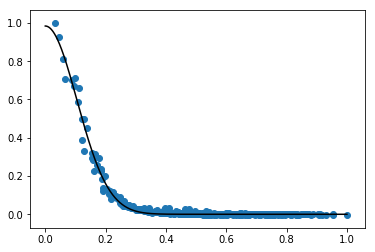

1.1610016778397203


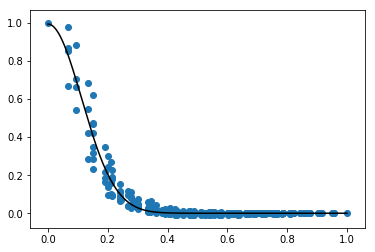

1.2698154281329086


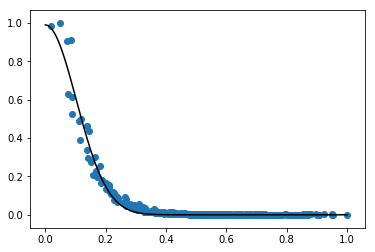

1.1165808199883993
Median seeing FWHM in arcsec: 1.160


In [31]:
Datacube.calculate_seeing(mag_cut=0.3, plot=True)

## 3. Spectra Extraction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.stats import mad_std, SigmaClip
from utils import *
from pipeline import *

In [3]:
Datacube = Read_Datacube("/home/qliu/data/A2465C_cube.fits",z0=0.245, name="A2465C",
                         SE_catalog="./A2465C/SE/A2465C_run2.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2465C_mask.fits')
Datacube.read_seg('./A2465C/SE/segment_run2.fits')

Optimal Aperture: 1.4 Rp, SNR = 20.4023


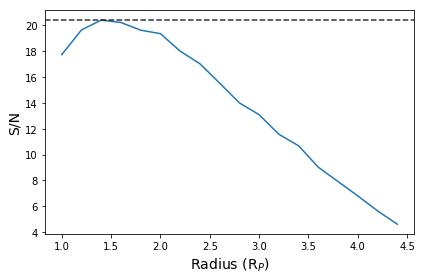

Optimal Aperture: 2.2 Rp, SNR = 7.7734


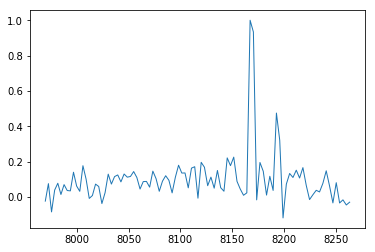

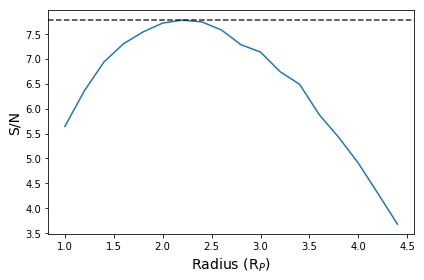

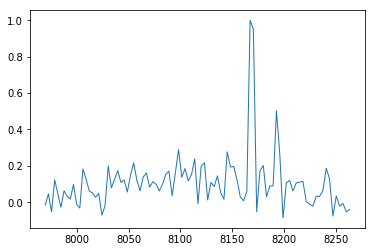

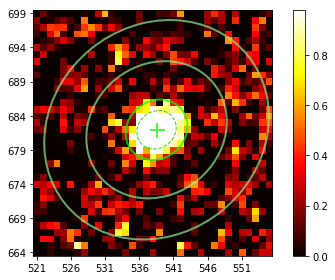

In [4]:
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=400, ext_type='sky', k1=5., k2=8, 
                                                     print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=400, ext_type='opt', k1=5., k2=8,
                                                    print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()

In [2]:
Datacube.spec_extraction_all(ks = np.arange(1.,4.6,0.1), k1=5., k2=8., save_path='./A2465C/fig/img_thumb_v2/', display=True)

#1 spectra extracted
#2 spectra extracted
#3 spectra extracted
#4 spectra extracted
#5 spectra extracted
#6 spectra extracted
#7 spectra extracted
#8 spectra extracted
#9 spectra extracted
#10 spectra extracted
#11 spectra extracted
#12 spectra extracted
#13 spectra extracted
#14 spectra extracted
#15 spectra extracted
#16 spectra extracted
#17 spectra extracted
#18 spectra extracted
#19 spectra extracted
#20 spectra extracted
#21 spectra extracted
#22 spectra extracted
#23 spectra extracted
#24 spectra extracted
#25 spectra extracted
#26 spectra extracted
#27 spectra extracted
#28 spectra extracted
#29 spectra extracted
#30 spectra extracted
#31 spectra extracted
#32 spectra extracted
#33 spectra extracted
#34 spectra extracted
#35 spectra extracted
#36 spectra extracted
#37 spectra extracted
#38 spectra extracted
#39 spectra extracted
#40 spectra extracted
#41 spectra extracted
#42 spectra extracted
#43 spectra extracted
#44 spectra extracted
#45 spectra extracted
#46 spectra extract

#362 spectra extracted
#363 spectra extracted
#364 spectra extracted
#365 spectra extracted
#366 spectra extracted
#367 spectra extracted
#368 spectra extracted
#369 spectra extracted
#370 spectra extracted
#371 spectra extracted
#372 spectra extracted
#373 spectra extracted
#374 spectra extracted
#375 spectra extracted
#376 spectra extracted
#377 spectra extracted
#378 spectra extracted
#379 spectra extracted
#380 spectra extracted
#381 spectra extracted
#382 spectra extracted
#383 spectra extracted
#384 spectra extracted
#385 spectra extracted
#386 spectra extracted
#387 spectra extracted
#388 spectra extracted
#389 spectra extracted
#390 spectra extracted
#391 spectra extracted
#392 spectra extracted
#393 spectra extracted
#394 spectra extracted
#395 spectra extracted
#396 spectra extracted
#397 spectra extracted
#398 spectra extracted
#399 spectra extracted
#400 spectra extracted
#401 spectra extracted
#402 spectra extracted
#403 spectra extracted
#404 spectra extracted
#405 spectr

#719 spectra extracted
#720 spectra extracted
#721 spectra extracted
#722 spectra extracted
#723 spectra extracted
#724 spectra extracted
#725 spectra extracted
#726 spectra extracted
#727 spectra extracted
#728 spectra extracted
#729 spectra extracted
#730 spectra extracted
#731 spectra extracted
#732 spectra extracted
#733 spectra extracted
#734 spectra extracted
#735 spectra extracted
#736 spectra extracted
#737 spectra extracted
#738 spectra extracted
#739 spectra extracted
#740 spectra extracted
#741 spectra extracted
#742 spectra extracted
#743 spectra extracted
#744 spectra extracted
#745 spectra extracted
#746 spectra extracted
#747 spectra extracted
#748 spectra extracted
#749 spectra extracted
#750 spectra extracted
#751 spectra extracted
#752 spectra extracted
#753 spectra extracted
#754 spectra extracted
#755 spectra extracted
#756 spectra extracted
#757 spectra extracted
#758 spectra extracted
#759 spectra extracted
#760 spectra extracted
#761 spectra extracted
#762 spectr

#1073 spectra extracted
#1074 spectra extracted
#1075 spectra extracted
#1076 spectra extracted
#1077 spectra extracted
#1078 spectra extracted
#1079 spectra extracted
#1080 spectra extracted
#1081 spectra extracted
#1082 spectra extracted
#1083 spectra extracted
#1084 spectra extracted
#1085 spectra extracted
#1086 spectra extracted
#1087 spectra extracted
#1088 spectra extracted
#1089 spectra extracted
#1090 spectra extracted
#1091 spectra extracted
#1092 spectra extracted
#1093 spectra extracted
#1094 spectra extracted
#1095 spectra extracted
#1096 spectra extracted
#1097 spectra extracted
#1098 spectra extracted
#1099 spectra extracted
#1100 spectra extracted
#1101 spectra extracted
#1102 spectra extracted
#1103 spectra extracted
#1104 spectra extracted
#1105 spectra extracted
#1106 spectra extracted
#1107 spectra extracted
#1108 spectra extracted
#1109 spectra extracted
#1110 spectra extracted
#1111 spectra extracted
#1112 spectra extracted
#1113 spectra extracted
#1114 spectra ex

In [7]:
# Pipe
Datacube.fit_continuum_all(model='GP', edge_ratio=None, plot=True, save_path='./A2465C/fig/fit_cont/')

#1 spectra continuum fitted
#2 spectra continuum fitted
#3 spectra continuum fitted
#4 spectra continuum fitted
#5 spectra continuum fitted
#6 spectra continuum fitted
#7 spectra continuum fitted
#8 spectra continuum fitted
#9 spectra continuum fitted
#10 spectra continuum fitted
#11 spectra continuum fitted
#12 spectra continuum fitted
#13 spectra continuum fitted
#14 spectra continuum fitted
#15 spectra continuum fitted
#16 spectra continuum fitted
#17 spectra continuum fitted
#18 spectra continuum fitted
#19 spectra continuum fitted
#20 spectra continuum fitted
#21 spectra continuum fitted
#22 spectra continuum fitted
#23 spectra continuum fitted
#24 spectra continuum fitted
#25 spectra continuum fitted
#26 spectra continuum fitted
#27 spectra continuum fitted
#28 spectra continuum fitted
#29 spectra continuum fitted
#30 spectra continuum fitted
#31 spectra continuum fitted
#32 spectra continuum fitted
#33 spectra continuum fitted
#34 spectra continuum fitted
#35 spectra continuum f

#278 spectra continuum fitted
#279 spectra continuum fitted
#280 spectra continuum fitted
#281 spectra continuum fitted
#282 spectra continuum fitted
#283 spectra continuum fitted
#284 spectra continuum fitted
#285 spectra continuum fitted
#286 spectra continuum fitted
#287 spectra continuum fitted
#288 spectra continuum fitted
#289 spectra continuum fitted
#290 spectra continuum fitted
#291 spectra continuum fitted
#292 spectra continuum fitted
#293 spectra continuum fitted
#294 spectra continuum fitted
#295 spectra continuum fitted
#296 spectra continuum fitted
#297 spectra continuum fitted
#298 spectra continuum fitted
#299 spectra continuum fitted
#300 spectra continuum fitted
#301 spectra continuum fitted
#302 spectra continuum fitted
#303 spectra continuum fitted
#304 spectra continuum fitted
#305 spectra continuum fitted
#306 spectra continuum fitted
#307 spectra continuum fitted
#308 spectra continuum fitted
#309 spectra continuum fitted
#310 spectra continuum fitted
#311 spect

#552 spectra continuum fitted
#553 spectra continuum fitted
#554 spectra continuum fitted
#555 spectra continuum fitted
#556 spectra continuum fitted
#557 spectra continuum fitted
#558 spectra continuum fitted
#559 spectra continuum fitted
#560 spectra continuum fitted
#561 spectra continuum fitted
#562 spectra continuum fitted
#563 spectra continuum fitted
#564 spectra continuum fitted
#565 spectra continuum fitted
#566 spectra continuum fitted
#567 spectra continuum fitted
#568 spectra continuum fitted
#569 spectra continuum fitted
#570 spectra continuum fitted
#571 spectra continuum fitted
#572 spectra continuum fitted
#573 spectra continuum fitted
#574 spectra continuum fitted
#575 spectra continuum fitted
#576 spectra continuum fitted
#577 spectra continuum fitted
#578 spectra continuum fitted
#579 spectra continuum fitted
#580 spectra continuum fitted
#581 spectra continuum fitted
#582 spectra continuum fitted
#583 spectra continuum fitted
#584 spectra continuum fitted
#585 spect

#827 spectra continuum fitted
#828 spectra continuum fitted
#829 spectra continuum fitted
#830 spectra continuum fitted
#831 spectra continuum fitted
#832 spectra continuum fitted
#833 spectra continuum fitted
#834 spectra continuum fitted
#835 spectra continuum fitted
#836 spectra continuum fitted
#837 spectra continuum fitted
#838 spectra continuum fitted
#839 spectra continuum fitted
#840 spectra continuum fitted
#841 spectra continuum fitted
#842 spectra continuum fitted
#843 spectra continuum fitted
#844 spectra continuum fitted
#845 spectra continuum fitted
#846 spectra continuum fitted
#847 spectra continuum fitted
#848 spectra continuum fitted
#849 spectra continuum fitted
#850 spectra continuum fitted
#851 spectra continuum fitted
#852 spectra continuum fitted
#853 spectra continuum fitted
#854 spectra continuum fitted
#855 spectra continuum fitted
#856 spectra continuum fitted
#857 spectra continuum fitted
#858 spectra continuum fitted
#859 spectra continuum fitted
#860 spect

#1098 spectra continuum fitted
#1099 spectra continuum fitted
#1100 spectra continuum fitted
#1101 spectra continuum fitted
#1102 spectra continuum fitted
#1103 spectra continuum fitted
#1104 spectra continuum fitted
#1105 spectra continuum fitted
#1106 spectra continuum fitted
#1107 spectra continuum fitted
#1108 spectra continuum fitted
#1109 spectra continuum fitted
#1110 spectra continuum fitted
#1111 spectra continuum fitted
#1112 spectra continuum fitted
#1113 spectra continuum fitted
#1114 spectra continuum fitted
#1115 spectra continuum fitted
#1116 spectra continuum fitted
#1117 spectra continuum fitted
#1118 spectra continuum fitted
#1119 spectra continuum fitted
#1120 spectra continuum fitted
#1121 spectra continuum fitted
#1122 spectra continuum fitted
#1123 spectra continuum fitted
#1124 spectra continuum fitted
#1125 spectra continuum fitted
#1126 spectra continuum fitted
#1127 spectra continuum fitted
#1128 spectra continuum fitted
#1129 spectra continuum fitted
#1130 sp

In [44]:
Datacube.save_spec_plot(save_path='./A2465C/fig/spec/')

In [8]:
Datacube.save_spec_fits(save_path='./A2465C/', suffix="v2")

## 4. Cross-correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from utils import *
from pipeline import *

Datacube = Read_Datacube("/home/qliu/data/A2465C_cube.fits", z0=0.245, name="A2465C", SE_catalog="./A2465C/SE/A2465C_run2.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2465C_mask.fits')
Datacube.read_seg('./A2465C/SE/segment_run2.fits')
Datacube.read_spec('./A2465C/A2465C-spec_v2.fits')

In [2]:
# Gaussian Template
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4,
                           temp_type="OII", ratio_prior="uniform", temp_model='gauss')

Template: Ha-NII_gauss  Total Number: 300
Template: Hb-OIII_gauss  Total Number: 120
Template: OII_gauss  Total Number: 15


Best z: 0.22102463048206525 Best sigma: 2.349318474538791
SE Object #1071  z: 0.221  Peak R: 1.114  Detction S/N: 5.023 Peak S/N: 4.317


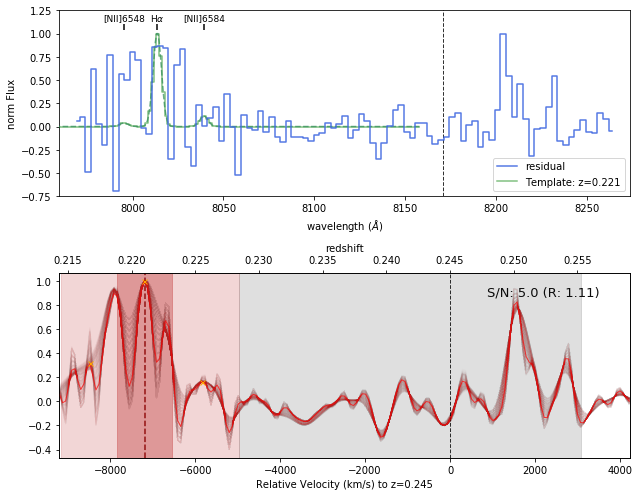

In [15]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast= Datacube.cross_correlation(1071)

Best z: 0.24479963763117768 Best sigma: 1.328637577476951
SE Object #13  z: 0.245  Peak R: 4.347  Detction S/N: 5.781 Peak S/N: 6.162


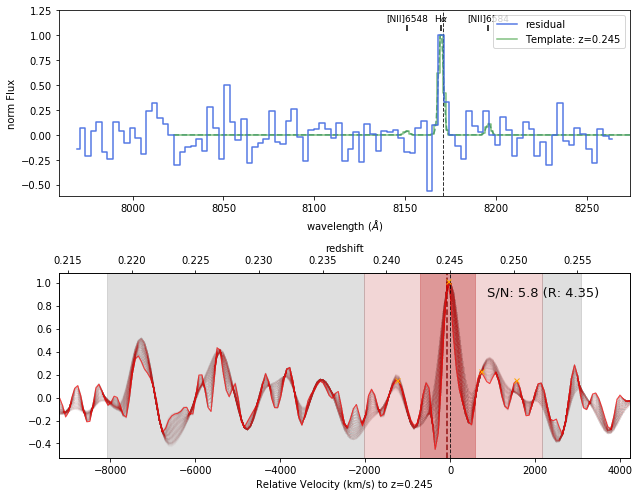

In [16]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast= Datacube.cross_correlation(13)

In [17]:
Datacube.cross_correlation_all(temp_type="Ha-NII", temp_model="gauss")  #new library

SE Object #1  z: 0.235  Peak R: 1.645  Detction S/N: 2.645 Peak S/N: 2.622
SE Object #2  z: 0.217  Peak R: 7.342  Detction S/N: 3.647 Peak S/N: 3.723
SE Object #3  z: 0.217  Peak R: 7.818  Detction S/N: 7.127 Peak S/N: 4.634
SE Object #4  z: 0.245  Peak R: 8.419  Detction S/N: 4.290 Peak S/N: 4.537
SE Object #5  z: 0.221  Peak R: 1.936  Detction S/N: 3.742 Peak S/N: 3.727
SE Object #6  z: 0.221  Peak R: 1.466  Detction S/N: 5.446 Peak S/N: 2.783
SE Object #7  z: 0.244  Peak R: 1.699  Detction S/N: 2.247 Peak S/N: 2.307
SE Object #8  z: 0.226  Peak R: 9.512  Detction S/N: 3.226 Peak S/N: 3.151
SE Object #9  z: 0.226  Peak R: 1.631  Detction S/N: 3.155 Peak S/N: 2.714
SE Object #10  z: 0.227  Peak R: 9.306  Detction S/N: 2.784 Peak S/N: 2.808
SE Object #11  z: 0.217  Peak R: 1.226  Detction S/N: 3.286 Peak S/N: 3.011
SE Object #12  z: 0.239  Peak R: 1.553  Detction S/N: 1.358 Peak S/N: 1.484
SE Object #13  z: 0.245  Peak R: 4.347  Detction S/N: 5.781 Peak S/N: 6.162
SE Object #14  z: 0.2

SE Object #109  z: 0.227  Peak R: 1.467  Detction S/N: 2.273 Peak S/N: 1.870
SE Object #110  z: 0.228  Peak R: 1.393  Detction S/N: 3.644 Peak S/N: 3.193
SE Object #111  z: 0.232  Peak R: 1.858  Detction S/N: 2.607 Peak S/N: 2.643
SE Object #112  z: 0.249  Peak R: 1.874  Detction S/N: 3.388 Peak S/N: 3.367
SE Object #113  z: 0.231  Peak R: 1.763  Detction S/N: 3.332 Peak S/N: 3.487
SE Object #114  z: 0.258  Peak R: 4.296  Detction S/N: 3.920 Peak S/N: 3.990
SE Object #115  z: 0.235  Peak R: 1.162  Detction S/N: 2.471 Peak S/N: 2.421
SE Object #116  z: 0.233  Peak R: 1.292  Detction S/N: 3.005 Peak S/N: 3.046
SE Object #117  z: 0.231  Peak R: 1.550  Detction S/N: 3.749 Peak S/N: 3.646
SE Object #118  z: 0.219  Peak R: 2.223  Detction S/N: 2.679 Peak S/N: 2.622
SE Object #119  z: 0.227  Peak R: 1.329  Detction S/N: 2.756 Peak S/N: 2.789
SE Object #120  z: 0.243  Peak R: 8.408  Detction S/N: 2.205 Peak S/N: 2.267
SE Object #121  z: 0.215  Peak R: 7.662  Detction S/N: 3.297 Peak S/N: 3.304

SE Object #216  z: 0.233  Peak R: 5.012  Detction S/N: 21.108 Peak S/N: 17.507
SE Object #217  z: 0.231  Peak R: 1.339  Detction S/N: 3.589 Peak S/N: 3.276
SE Object #218  z: 0.231  Peak R: 1.955  Detction S/N: 2.439 Peak S/N: 2.383
SE Object #219  z: 0.221  Peak R: 2.653  Detction S/N: 2.747 Peak S/N: 2.724
SE Object #220  z: 0.252  Peak R: 2.110  Detction S/N: 2.275 Peak S/N: 2.218
SE Object #221  z: 0.245  Peak R: 4.110  Detction S/N: 8.385 Peak S/N: 7.965
SE Object #222  z: 0.233  Peak R: 6.396  Detction S/N: 2.738 Peak S/N: 2.522
SE Object #223  z: 0.225  Peak R: 6.397  Detction S/N: 2.243 Peak S/N: 2.443
SE Object #224  z: 0.227  Peak R: 2.109  Detction S/N: 2.633 Peak S/N: 2.639
SE Object #225  z: 0.243  Peak R: 3.830  Detction S/N: 3.281 Peak S/N: 3.372
SE Object #226  z: 0.220  Peak R: 6.978  Detction S/N: 2.086 Peak S/N: 2.263
SE Object #227  z: 0.232  Peak R: 1.544  Detction S/N: 3.300 Peak S/N: 3.224
SE Object #228  z: 0.233  Peak R: 7.536  Detction S/N: 3.495 Peak S/N: 3.5

SE Object #323  z: 0.228  Peak R: 1.421  Detction S/N: 3.352 Peak S/N: 2.881
SE Object #324  z: 0.226  Peak R: 7.442  Detction S/N: 2.672 Peak S/N: 2.688
SE Object #325  z: 0.258  Peak R: 1.547  Detction S/N: 4.895 Peak S/N: 4.133
SE Object #326  z: 0.217  Peak R: 1.613  Detction S/N: 2.211 Peak S/N: 2.201
SE Object #327  z: 0.227  Peak R: 1.187  Detction S/N: 2.783 Peak S/N: 2.507
SE Object #328  z: 0.248  Peak R: 4.859  Detction S/N: 3.751 Peak S/N: 3.969
SE Object #329  z: 0.248  Peak R: 1.316  Detction S/N: 4.658 Peak S/N: 3.838
SE Object #330  z: 0.246  Peak R: 7.356  Detction S/N: 2.695 Peak S/N: 2.791
SE Object #331  z: 0.225  Peak R: 1.852  Detction S/N: 2.737 Peak S/N: 3.083
SE Object #332  z: 0.236  Peak R: 4.795  Detction S/N: 3.241 Peak S/N: 2.994
SE Object #333  z: 0.245  Peak R: 1.405  Detction S/N: 2.619 Peak S/N: 2.683
SE Object #334  z: 0.244  Peak R: 2.297  Detction S/N: 2.340 Peak S/N: 2.214
SE Object #335  z: 0.245  Peak R: 2.804  Detction S/N: 3.612 Peak S/N: 3.207

SE Object #431  z: 0.227  Peak R: 1.556  Detction S/N: 2.607 Peak S/N: 2.685
SE Object #432  z: 0.241  Peak R: 2.335  Detction S/N: 2.214 Peak S/N: 2.418
SE Object #433  z: 0.225  Peak R: 7.955  Detction S/N: 2.606 Peak S/N: 2.734
SE Object #434  z: 0.256  Peak R: 2.388  Detction S/N: 2.113 Peak S/N: 2.195
SE Object #435  z: 0.236  Peak R: 1.487  Detction S/N: 4.312 Peak S/N: 4.118
SE Object #436  z: 0.248  Peak R: 2.489  Detction S/N: 2.377 Peak S/N: 2.177
SE Object #437  z: 0.219  Peak R: 1.839  Detction S/N: 2.674 Peak S/N: 2.807
SE Object #438  z: 0.246  Peak R: 1.099  Detction S/N: 3.588 Peak S/N: 2.992
SE Object #439  z: 0.230  Peak R: 1.277  Detction S/N: 2.700 Peak S/N: 2.561
SE Object #440  z: 0.236  Peak R: 1.496  Detction S/N: 1.782 Peak S/N: 1.935
SE Object #441  z: 0.236  Peak R: 1.353  Detction S/N: 2.344 Peak S/N: 2.404
SE Object #442  z: 0.253  Peak R: 2.127  Detction S/N: 2.219 Peak S/N: 2.156
SE Object #443  z: 0.229  Peak R: 1.844  Detction S/N: 3.164 Peak S/N: 3.170

SE Object #539  z: 0.229  Peak R: 2.170  Detction S/N: 4.349 Peak S/N: 3.383
SE Object #540  z: 0.228  Peak R: 2.297  Detction S/N: 3.303 Peak S/N: 2.492
SE Object #541  z: 0.248  Peak R: 2.743  Detction S/N: 8.397 Peak S/N: 6.870
SE Object #542  z: 0.244  Peak R: 2.263  Detction S/N: 4.435 Peak S/N: 4.725
SE Object #543  z: 0.254  Peak R: 1.857  Detction S/N: 2.522 Peak S/N: 2.442
SE Object #544  z: 0.245  Peak R: 3.137  Detction S/N: 24.188 Peak S/N: 12.635
SE Object #545  z: 0.248  Peak R: 4.241  Detction S/N: 4.547 Peak S/N: 4.959
SE Object #546  z: 0.239  Peak R: 1.441  Detction S/N: 1.486 Peak S/N: 1.505
SE Object #547  z: 0.245  Peak R: 1.252  Detction S/N: 2.519 Peak S/N: 2.484
SE Object #548  z: 0.250  Peak R: 3.547  Detction S/N: 7.362 Peak S/N: 7.537
SE Object #549  z: 0.228  Peak R: 2.337  Detction S/N: 2.960 Peak S/N: 3.170
SE Object #550  z: 0.235  Peak R: 2.461  Detction S/N: 2.736 Peak S/N: 2.717
SE Object #551  z: 0.231  Peak R: 2.467  Detction S/N: 2.834 Peak S/N: 2.9

SE Object #647  z: 0.227  Peak R: 1.923  Detction S/N: 6.691 Peak S/N: 6.043
SE Object #648  z: 0.229  Peak R: 1.384  Detction S/N: 3.366 Peak S/N: 3.303
SE Object #649  z: 0.243  Peak R: 1.931  Detction S/N: 2.372 Peak S/N: 2.232
SE Object #650  z: 0.216  Peak R: 7.455  Detction S/N: 2.872 Peak S/N: 2.775
SE Object #651  z: 0.240  Peak R: 2.001  Detction S/N: 2.700 Peak S/N: 2.766
SE Object #652  z: 0.251  Peak R: 5.363  Detction S/N: 2.986 Peak S/N: 2.992
SE Object #653  z: 0.224  Peak R: 2.117  Detction S/N: 2.802 Peak S/N: 2.797
SE Object #654  z: 0.250  Peak R: 9.181  Detction S/N: 2.666 Peak S/N: 2.638
SE Object #655  z: 0.252  Peak R: 3.103  Detction S/N: 2.151 Peak S/N: 2.190
SE Object #656  z: 0.247  Peak R: 1.553  Detction S/N: 4.125 Peak S/N: 3.720
SE Object #657  z: 0.228  Peak R: 1.433  Detction S/N: 2.872 Peak S/N: 2.759
SE Object #658  z: 0.246  Peak R: 3.572  Detction S/N: 5.306 Peak S/N: 4.912
SE Object #659  z: 0.230  Peak R: 1.822  Detction S/N: 3.507 Peak S/N: 2.771

SE Object #754  z: 0.227  Peak R: 1.948  Detction S/N: 2.494 Peak S/N: 2.475
SE Object #755  z: 0.243  Peak R: 2.636  Detction S/N: 9.810 Peak S/N: 8.171
SE Object #756  z: 0.253  Peak R: 2.341  Detction S/N: 8.380 Peak S/N: 8.367
SE Object #757  z: 0.224  Peak R: 1.630  Detction S/N: 1.880 Peak S/N: 1.969
SE Object #758  z: 0.256  Peak R: 2.107  Detction S/N: 2.203 Peak S/N: 2.187
SE Object #759  z: 0.248  Peak R: 1.806  Detction S/N: 1.290 Peak S/N: 1.138
SE Object #760  z: 0.228  Peak R: 1.701  Detction S/N: 2.666 Peak S/N: 2.837
SE Object #761  z: 0.229  Peak R: 2.502  Detction S/N: 2.879 Peak S/N: 3.167
SE Object #762  z: 0.233  Peak R: 9.807  Detction S/N: 2.461 Peak S/N: 2.541
SE Object #763  z: 0.239  Peak R: 7.959  Detction S/N: 2.183 Peak S/N: 2.433
SE Object #764  z: 0.236  Peak R: 1.589  Detction S/N: 3.799 Peak S/N: 3.283
SE Object #765  z: 0.235  Peak R: 9.719  Detction S/N: 2.267 Peak S/N: 2.467
SE Object #766  z: 0.249  Peak R: 1.008  Detction S/N: 1.593 Peak S/N: 1.503

SE Object #861  z: 0.256  Peak R: 3.301  Detction S/N: 2.717 Peak S/N: 2.492
SE Object #862  z: 0.247  Peak R: 2.312  Detction S/N: 3.469 Peak S/N: 3.432
SE Object #863  z: 0.251  Peak R: 1.082  Detction S/N: 3.786 Peak S/N: 3.062
SE Object #864  z: 0.252  Peak R: 2.569  Detction S/N: 4.213 Peak S/N: 3.968
SE Object #865  z: 0.217  Peak R: 3.842  Detction S/N: 2.848 Peak S/N: 2.861
SE Object #866  z: 0.220  Peak R: 9.007  Detction S/N: 2.944 Peak S/N: 3.112
SE Object #867  z: 0.221  Peak R: 2.806  Detction S/N: 3.303 Peak S/N: 3.388
SE Object #868  z: 0.218  Peak R: 2.125  Detction S/N: 4.398 Peak S/N: 4.621
SE Object #869  z: 0.243  Peak R: 1.999  Detction S/N: 4.180 Peak S/N: 4.294
SE Object #870  z: 0.218  Peak R: 8.094  Detction S/N: 3.721 Peak S/N: 3.017
SE Object #871  z: 0.252  Peak R: 1.835  Detction S/N: 4.083 Peak S/N: 3.691
SE Object #872  z: 0.231  Peak R: 1.982  Detction S/N: 2.839 Peak S/N: 2.709
SE Object #873  z: 0.225  Peak R: 7.217  Detction S/N: 2.624 Peak S/N: 2.423

SE Object #968  z: 0.231  Peak R: 2.106  Detction S/N: 2.902 Peak S/N: 2.740
SE Object #969  z: 0.229  Peak R: 1.728  Detction S/N: 3.590 Peak S/N: 3.058
SE Object #970  z: 0.256  Peak R: 1.442  Detction S/N: 3.990 Peak S/N: 3.616
SE Object #971  z: 0.226  Peak R: 6.351  Detction S/N: 2.038 Peak S/N: 2.104
SE Object #972  z: 0.226  Peak R: 9.746  Detction S/N: 3.414 Peak S/N: 3.155
SE Object #973  z: 0.249  Peak R: 9.830  Detction S/N: 6.901 Peak S/N: 7.387
SE Object #974  z: 0.219  Peak R: 9.766  Detction S/N: 2.270 Peak S/N: 2.139
SE Object #975  z: 0.216  Peak R: 7.270  Detction S/N: 2.645 Peak S/N: 2.618
SE Object #976  z: 0.215  Peak R: 7.802  Detction S/N: 2.762 Peak S/N: 2.621
SE Object #977  z: 0.219  Peak R: 2.967  Detction S/N: 2.663 Peak S/N: 2.795
SE Object #978  z: 0.217  Peak R: 6.118  Detction S/N: 3.086 Peak S/N: 3.028
SE Object #979  z: 0.227  Peak R: 2.513  Detction S/N: 2.035 Peak S/N: 2.025
SE Object #980  z: 0.229  Peak R: 2.224  Detction S/N: 2.991 Peak S/N: 2.768

SE Object #1074  z: 0.253  Peak R: 9.455  Detction S/N: 2.892 Peak S/N: 3.023
SE Object #1075  z: 0.245  Peak R: 3.931  Detction S/N: 11.077 Peak S/N: 10.699
SE Object #1076  z: 0.247  Peak R: 1.178  Detction S/N: 2.633 Peak S/N: 2.302
SE Object #1077  z: 0.246  Peak R: 4.428  Detction S/N: 7.849 Peak S/N: 7.691
SE Object #1078  z: 0.219  Peak R: 1.993  Detction S/N: 4.937 Peak S/N: 4.381
SE Object #1079  z: 0.233  Peak R: 3.348  Detction S/N: 1.699 Peak S/N: 1.847
SE Object #1080  z: 0.238  Peak R: 2.284  Detction S/N: 3.704 Peak S/N: 2.839
SE Object #1081  z: 0.245  Peak R: 1.224  Detction S/N: 2.786 Peak S/N: 2.559
SE Object #1082  z: 0.247  Peak R: 4.993  Detction S/N: 2.691 Peak S/N: 2.972
SE Object #1083  z: 0.223  Peak R: 1.208  Detction S/N: 2.856 Peak S/N: 2.749
SE Object #1084  z: 0.245  Peak R: 4.096  Detction S/N: 8.334 Peak S/N: 7.111
SE Object #1085  z: 0.217  Peak R: 9.747  Detction S/N: 1.960 Peak S/N: 2.018
SE Object #1086  z: 0.245  Peak R: 3.727  Detction S/N: 7.793 

SE Object #1179  z: 0.240  Peak R: 2.172  Detction S/N: 2.397 Peak S/N: 2.222
SE Object #1180  z: 0.217  Peak R: 7.646  Detction S/N: 2.730 Peak S/N: 2.488
SE Object #1181  z: 0.239  Peak R: 1.454  Detction S/N: 4.547 Peak S/N: 4.153
SE Object #1182  z: 0.249  Peak R: 9.114  Detction S/N: 3.224 Peak S/N: 2.928
SE Object #1183  z: 0.253  Peak R: 2.219  Detction S/N: 2.774 Peak S/N: 2.909
SE Object #1184  z: 0.229  Peak R: 1.159  Detction S/N: 3.125 Peak S/N: 2.692
SE Object #1185  z: 0.228  Peak R: 2.432  Detction S/N: 2.767 Peak S/N: 2.664
SE Object #1186  z: 0.239  Peak R: 1.183  Detction S/N: 3.196 Peak S/N: 3.245
SE Object #1187  z: 0.228  Peak R: 1.538  Detction S/N: 2.760 Peak S/N: 2.668
SE Object #1188  z: 0.245  Peak R: 3.135  Detction S/N: 2.056 Peak S/N: 2.349
SE Object #1189  z: 0.230  Peak R: 1.456  Detction S/N: 3.174 Peak S/N: 3.069
SE Object #1190  z: 0.217  Peak R: 8.087  Detction S/N: 5.240 Peak S/N: 5.154
SE Object #1191  z: 0.248  Peak R: 3.216  Detction S/N: 19.661 P

In [18]:
Datacube.save_cc_fits(save_path='./A2465C/', suffix="v2")

Saving cross-correlation results for A2465C using Ha-NII_gauss templates


In [3]:
Datacube.cross_correlation_all(temp_type="Hb-OIII", temp_model="gauss")  #new library

SE Object #1  z: 0.628  Peak R: 7.616  Detction S/N: 2.897 Peak S/N: 2.897
SE Object #2  z: 0.622  Peak R: 6.768  Detction S/N: 3.177 Peak S/N: 3.177
SE Object #3  z: 0.647  Peak R: 1.000  Detction S/N: 2.673 Peak S/N: 2.673
SE Object #4  z: 0.632  Peak R: 1.999  Detction S/N: 6.950 Peak S/N: 6.950
SE Object #5  z: 0.620  Peak R: 1.731  Detction S/N: 2.673 Peak S/N: 2.673
SE Object #6  z: 0.630  Peak R: 6.221  Detction S/N: 4.050 Peak S/N: 4.050
SE Object #7  z: 0.647  Peak R: 2.132  Detction S/N: 3.208 Peak S/N: 3.208
SE Object #8  z: 0.648  Peak R: 1.102  Detction S/N: 3.409 Peak S/N: 3.409
SE Object #9  z: 0.621  Peak R: 5.717  Detction S/N: 3.155 Peak S/N: 3.155
SE Object #10  z: 0.624  Peak R: 5.524  Detction S/N: 2.473 Peak S/N: 2.473
SE Object #11  z: 0.626  Peak R: 1.293  Detction S/N: 4.315 Peak S/N: 4.315
SE Object #12  z: 0.624  Peak R: 1.000  Detction S/N: 4.164 Peak S/N: 4.164
SE Object #13  z: 0.631  Peak R: 5.541  Detction S/N: 9.523 Peak S/N: 9.523
SE Object #14  z: 0.6

SE Object #109  z: 0.627  Peak R: 5.625  Detction S/N: 1.623 Peak S/N: 1.623
SE Object #110  z: 0.623  Peak R: 5.746  Detction S/N: 3.518 Peak S/N: 3.518
SE Object #111  z: 0.629  Peak R: 1.253  Detction S/N: 2.872 Peak S/N: 2.872
SE Object #112  z: 0.637  Peak R: 1.001  Detction S/N: 3.823 Peak S/N: 3.823
SE Object #113  z: 0.629  Peak R: 1.882  Detction S/N: 3.478 Peak S/N: 3.478
SE Object #114  z: 0.649  Peak R: 8.310  Detction S/N: 4.896 Peak S/N: 4.896
SE Object #115  z: 0.626  Peak R: 1.608  Detction S/N: 2.360 Peak S/N: 2.360
SE Object #116  z: 0.622  Peak R: 1.305  Detction S/N: 2.738 Peak S/N: 2.738
SE Object #117  z: 0.634  Peak R: 1.411  Detction S/N: 3.330 Peak S/N: 3.330
SE Object #118  z: 0.629  Peak R: 1.800  Detction S/N: 4.521 Peak S/N: 4.521
SE Object #119  z: 0.635  Peak R: 3.020  Detction S/N: 3.050 Peak S/N: 3.050
SE Object #120  z: 0.628  Peak R: 1.952  Detction S/N: 3.023 Peak S/N: 3.023
SE Object #121  z: 0.620  Peak R: 2.950  Detction S/N: 3.366 Peak S/N: 3.366

SE Object #216  z: 0.632  Peak R: 1.000  Detction S/N: 5.379 Peak S/N: 5.379
SE Object #217  z: 0.622  Peak R: 7.894  Detction S/N: 3.993 Peak S/N: 3.993
SE Object #218  z: 0.619  Peak R: 3.383  Detction S/N: 2.985 Peak S/N: 2.985
SE Object #219  z: 0.650  Peak R: 1.032  Detction S/N: 2.999 Peak S/N: 2.999
SE Object #220  z: 0.641  Peak R: 1.002  Detction S/N: 3.829 Peak S/N: 3.829
SE Object #221  z: 0.631  Peak R: 7.428  Detction S/N: 8.978 Peak S/N: 8.978
SE Object #222  z: 0.621  Peak R: 4.241  Detction S/N: 2.843 Peak S/N: 2.843
SE Object #223  z: 0.636  Peak R: 1.000  Detction S/N: 2.909 Peak S/N: 2.909
SE Object #224  z: 0.645  Peak R: 6.062  Detction S/N: 2.107 Peak S/N: 2.107
SE Object #225  z: 0.628  Peak R: 7.608  Detction S/N: 5.000 Peak S/N: 5.000
SE Object #226  z: 0.647  Peak R: 1.902  Detction S/N: 3.149 Peak S/N: 3.149
SE Object #227  z: 0.621  Peak R: 3.652  Detction S/N: 2.543 Peak S/N: 2.543
SE Object #228  z: 0.625  Peak R: 3.233  Detction S/N: 5.129 Peak S/N: 5.129

SE Object #324  z: 0.645  Peak R: 4.689  Detction S/N: 2.449 Peak S/N: 2.449
SE Object #325  z: 0.649  Peak R: 6.235  Detction S/N: 5.830 Peak S/N: 5.830
SE Object #326  z: 0.619  Peak R: 5.163  Detction S/N: 3.145 Peak S/N: 3.145
SE Object #327  z: 0.647  Peak R: 3.631  Detction S/N: 3.022 Peak S/N: 3.022
SE Object #328  z: 0.636  Peak R: 1.000  Detction S/N: 5.944 Peak S/N: 5.944
SE Object #329  z: 0.635  Peak R: 2.166  Detction S/N: 4.687 Peak S/N: 4.687
SE Object #330  z: 0.634  Peak R: 9.789  Detction S/N: 4.870 Peak S/N: 4.870
SE Object #331  z: 0.624  Peak R: 1.350  Detction S/N: 3.458 Peak S/N: 3.458
SE Object #332  z: 0.620  Peak R: 1.480  Detction S/N: 3.614 Peak S/N: 3.614
SE Object #333  z: 0.632  Peak R: 1.086  Detction S/N: 2.644 Peak S/N: 2.644
SE Object #334  z: 0.630  Peak R: 2.809  Detction S/N: 3.432 Peak S/N: 3.432
SE Object #335  z: 0.631  Peak R: 9.120  Detction S/N: 3.781 Peak S/N: 3.781
SE Object #336  z: 0.620  Peak R: 3.091  Detction S/N: 2.779 Peak S/N: 2.779

SE Object #431  z: 0.637  Peak R: 1.000  Detction S/N: 3.038 Peak S/N: 3.038
SE Object #432  z: 0.626  Peak R: 1.410  Detction S/N: 3.680 Peak S/N: 3.680
SE Object #433  z: 0.640  Peak R: 1.001  Detction S/N: 3.318 Peak S/N: 3.318
SE Object #434  z: 0.624  Peak R: 8.549  Detction S/N: 3.646 Peak S/N: 3.646
SE Object #435  z: 0.619  Peak R: 4.061  Detction S/N: 4.507 Peak S/N: 4.507
SE Object #436  z: 0.635  Peak R: 5.522  Detction S/N: 3.195 Peak S/N: 3.195
SE Object #437  z: 0.632  Peak R: 1.521  Detction S/N: 3.271 Peak S/N: 3.271
SE Object #438  z: 0.633  Peak R: 2.263  Detction S/N: 3.877 Peak S/N: 3.877
SE Object #439  z: 0.630  Peak R: 7.119  Detction S/N: 3.449 Peak S/N: 3.449
SE Object #440  z: 0.631  Peak R: 2.152  Detction S/N: 1.905 Peak S/N: 1.905
SE Object #441  z: 0.631  Peak R: 5.109  Detction S/N: 2.340 Peak S/N: 2.340
SE Object #442  z: 0.642  Peak R: 4.535  Detction S/N: 3.404 Peak S/N: 3.404
SE Object #443  z: 0.628  Peak R: 4.418  Detction S/N: 2.271 Peak S/N: 2.271

SE Object #538  z: 0.631  Peak R: 6.715  Detction S/N: 17.448 Peak S/N: 17.448
SE Object #539  z: 0.620  Peak R: 2.047  Detction S/N: 4.902 Peak S/N: 4.902
SE Object #540  z: 0.624  Peak R: 1.161  Detction S/N: 1.790 Peak S/N: 1.790
SE Object #541  z: 0.636  Peak R: 1.000  Detction S/N: 6.246 Peak S/N: 6.246
SE Object #542  z: 0.630  Peak R: 1.466  Detction S/N: 6.044 Peak S/N: 6.044
SE Object #543  z: 0.644  Peak R: 3.307  Detction S/N: 3.822 Peak S/N: 3.822
SE Object #544  z: 0.631  Peak R: 2.958  Detction S/N: 13.017 Peak S/N: 13.017
SE Object #545  z: 0.635  Peak R: 3.590  Detction S/N: 8.676 Peak S/N: 8.676
SE Object #546  z: 0.623  Peak R: 8.228  Detction S/N: 1.936 Peak S/N: 1.936
SE Object #547  z: 0.632  Peak R: 4.000  Detction S/N: 3.578 Peak S/N: 3.578
SE Object #548  z: 0.639  Peak R: 1.000  Detction S/N: 8.532 Peak S/N: 8.532
SE Object #549  z: 0.624  Peak R: 4.154  Detction S/N: 5.104 Peak S/N: 5.104
SE Object #550  z: 0.633  Peak R: 8.047  Detction S/N: 3.490 Peak S/N: 3

SE Object #646  z: 0.625  Peak R: 9.164  Detction S/N: 3.480 Peak S/N: 3.480
SE Object #647  z: 0.620  Peak R: 2.515  Detction S/N: 2.592 Peak S/N: 2.592
SE Object #648  z: 0.622  Peak R: 1.403  Detction S/N: 2.616 Peak S/N: 2.616
SE Object #649  z: 0.633  Peak R: 5.545  Detction S/N: 2.276 Peak S/N: 2.276
SE Object #650  z: 0.643  Peak R: 2.692  Detction S/N: 4.734 Peak S/N: 4.734
SE Object #651  z: 0.625  Peak R: 1.774  Detction S/N: 3.417 Peak S/N: 3.417
SE Object #652  z: 0.640  Peak R: 1.001  Detction S/N: 3.711 Peak S/N: 3.711
SE Object #653  z: 0.619  Peak R: 1.622  Detction S/N: 2.323 Peak S/N: 2.323
SE Object #654  z: 0.638  Peak R: 1.003  Detction S/N: 4.296 Peak S/N: 4.296
SE Object #655  z: 0.632  Peak R: 2.769  Detction S/N: 4.079 Peak S/N: 4.079
SE Object #656  z: 0.634  Peak R: 2.097  Detction S/N: 4.220 Peak S/N: 4.220
SE Object #657  z: 0.625  Peak R: 3.836  Detction S/N: 5.026 Peak S/N: 5.026
SE Object #658  z: 0.632  Peak R: 3.053  Detction S/N: 7.334 Peak S/N: 7.334

SE Object #754  z: 0.636  Peak R: 1.000  Detction S/N: 2.873 Peak S/N: 2.873
SE Object #755  z: 0.629  Peak R: 4.941  Detction S/N: 8.015 Peak S/N: 8.015
SE Object #756  z: 0.643  Peak R: 4.370  Detction S/N: 5.369 Peak S/N: 5.369
SE Object #757  z: 0.624  Peak R: 1.418  Detction S/N: 2.991 Peak S/N: 2.991
SE Object #758  z: 0.646  Peak R: 1.153  Detction S/N: 3.455 Peak S/N: 3.455
SE Object #759  z: 0.636  Peak R: 1.013  Detction S/N: 1.686 Peak S/N: 1.686
SE Object #760  z: 0.626  Peak R: 5.311  Detction S/N: 2.691 Peak S/N: 2.691
SE Object #761  z: 0.633  Peak R: 5.483  Detction S/N: 2.996 Peak S/N: 2.996
SE Object #762  z: 0.637  Peak R: 1.006  Detction S/N: 3.293 Peak S/N: 3.293
SE Object #763  z: 0.624  Peak R: 2.000  Detction S/N: 3.896 Peak S/N: 3.896
SE Object #764  z: 0.619  Peak R: 1.950  Detction S/N: 4.851 Peak S/N: 4.851
SE Object #765  z: 0.645  Peak R: 1.464  Detction S/N: 3.146 Peak S/N: 3.146
SE Object #766  z: 0.635  Peak R: 1.044  Detction S/N: 1.759 Peak S/N: 1.759

SE Object #861  z: 0.646  Peak R: 2.934  Detction S/N: 2.913 Peak S/N: 2.913
SE Object #862  z: 0.634  Peak R: 1.822  Detction S/N: 5.061 Peak S/N: 5.061
SE Object #863  z: 0.643  Peak R: 1.069  Detction S/N: 3.217 Peak S/N: 3.217
SE Object #864  z: 0.641  Peak R: 1.002  Detction S/N: 3.803 Peak S/N: 3.803
SE Object #865  z: 0.638  Peak R: 1.001  Detction S/N: 3.584 Peak S/N: 3.584
SE Object #866  z: 0.620  Peak R: 3.682  Detction S/N: 1.959 Peak S/N: 1.959
SE Object #867  z: 0.636  Peak R: 1.000  Detction S/N: 2.389 Peak S/N: 2.389
SE Object #868  z: 0.650  Peak R: 1.662  Detction S/N: 3.205 Peak S/N: 3.205
SE Object #869  z: 0.629  Peak R: 1.779  Detction S/N: 4.396 Peak S/N: 4.396
SE Object #870  z: 0.645  Peak R: 1.051  Detction S/N: 2.630 Peak S/N: 2.630
SE Object #871  z: 0.641  Peak R: 1.005  Detction S/N: 4.074 Peak S/N: 4.074
SE Object #872  z: 0.619  Peak R: 4.072  Detction S/N: 3.149 Peak S/N: 3.149
SE Object #873  z: 0.625  Peak R: 1.539  Detction S/N: 2.848 Peak S/N: 2.848

SE Object #969  z: 0.631  Peak R: 1.873  Detction S/N: 3.599 Peak S/N: 3.599
SE Object #970  z: 0.646  Peak R: 3.149  Detction S/N: 4.521 Peak S/N: 4.521
SE Object #971  z: 0.645  Peak R: 5.399  Detction S/N: 2.093 Peak S/N: 2.093
SE Object #972  z: 0.643  Peak R: 4.261  Detction S/N: 2.076 Peak S/N: 2.076
SE Object #973  z: 0.636  Peak R: 1.001  Detction S/N: 8.929 Peak S/N: 8.929
SE Object #974  z: 0.623  Peak R: 5.209  Detction S/N: 2.323 Peak S/N: 2.323
SE Object #975  z: 0.643  Peak R: 7.565  Detction S/N: 3.214 Peak S/N: 3.214
SE Object #976  z: 0.634  Peak R: 8.632  Detction S/N: 3.184 Peak S/N: 3.184
SE Object #977  z: 0.647  Peak R: 1.140  Detction S/N: 2.466 Peak S/N: 2.466
SE Object #978  z: 0.624  Peak R: 1.000  Detction S/N: 4.086 Peak S/N: 4.086
SE Object #979  z: 0.634  Peak R: 1.586  Detction S/N: 2.052 Peak S/N: 2.052
SE Object #980  z: 0.620  Peak R: 1.990  Detction S/N: 4.461 Peak S/N: 4.461
SE Object #981  z: 0.640  Peak R: 1.008  Detction S/N: 3.170 Peak S/N: 3.170

SE Object #1075  z: 0.631  Peak R: 5.052  Detction S/N: 13.921 Peak S/N: 13.921
SE Object #1076  z: 0.634  Peak R: 8.505  Detction S/N: 2.820 Peak S/N: 2.820
SE Object #1077  z: 0.634  Peak R: 2.434  Detction S/N: 8.149 Peak S/N: 8.149
SE Object #1078  z: 0.621  Peak R: 1.898  Detction S/N: 2.791 Peak S/N: 2.791
SE Object #1079  z: 0.632  Peak R: 2.837  Detction S/N: 2.028 Peak S/N: 2.028
SE Object #1080  z: 0.622  Peak R: 2.463  Detction S/N: 3.694 Peak S/N: 3.694
SE Object #1081  z: 0.635  Peak R: 1.473  Detction S/N: 3.117 Peak S/N: 3.117
SE Object #1082  z: 0.634  Peak R: 1.313  Detction S/N: 4.036 Peak S/N: 4.036
SE Object #1083  z: 0.626  Peak R: 7.528  Detction S/N: 2.881 Peak S/N: 2.881
SE Object #1084  z: 0.632  Peak R: 4.951  Detction S/N: 9.209 Peak S/N: 9.209
SE Object #1085  z: 0.642  Peak R: 1.113  Detction S/N: 2.043 Peak S/N: 2.043
SE Object #1086  z: 0.631  Peak R: 1.895  Detction S/N: 5.787 Peak S/N: 5.787
SE Object #1087  z: 0.629  Peak R: 1.366  Detction S/N: 3.520 

SE Object #1181  z: 0.623  Peak R: 1.487  Detction S/N: 4.745 Peak S/N: 4.745
SE Object #1182  z: 0.637  Peak R: 1.000  Detction S/N: 3.592 Peak S/N: 3.592
SE Object #1183  z: 0.642  Peak R: 1.278  Detction S/N: 4.855 Peak S/N: 4.855
SE Object #1184  z: 0.643  Peak R: 4.063  Detction S/N: 2.411 Peak S/N: 2.411
SE Object #1185  z: 0.634  Peak R: 5.884  Detction S/N: 2.607 Peak S/N: 2.607
SE Object #1186  z: 0.624  Peak R: 1.069  Detction S/N: 3.702 Peak S/N: 3.702
SE Object #1187  z: 0.635  Peak R: 1.398  Detction S/N: 3.825 Peak S/N: 3.825
SE Object #1188  z: 0.632  Peak R: 2.299  Detction S/N: 5.505 Peak S/N: 5.505
SE Object #1189  z: 0.631  Peak R: 3.865  Detction S/N: 3.051 Peak S/N: 3.051
SE Object #1190  z: 0.628  Peak R: 4.919  Detction S/N: 3.733 Peak S/N: 3.733
SE Object #1191  z: 0.635  Peak R: 2.966  Detction S/N: 13.353 Peak S/N: 13.353
SE Object #1192  z: 0.633  Peak R: 1.377  Detction S/N: 4.436 Peak S/N: 4.436
SE Object #1193  z: 0.621  Peak R: 1.579  Detction S/N: 1.731 

In [4]:
Datacube.save_cc_fits(save_path='./A2465C/', suffix="v2")

Saving cross-correlation results for A2465C using Hb-OIII_gauss templates


In [5]:
Y_pix, X_pix = np.indices(Datacube.mask_edge.shape)
dist_edge = np.array([np.sqrt((X_pix[~Datacube.mask_edge]-gal["X_IMAGE"])**2 + (Y_pix[~Datacube.mask_edge]-gal["Y_IMAGE"])**2).min() \
                      for gal in Datacube.Tab_SE])

227

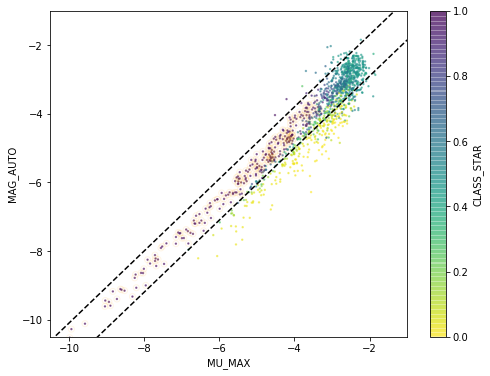

In [6]:
plt.figure(figsize=(8,6))
mag_auto = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"])
plt.scatter(Datacube.Tab_SE["MU_MAX"], mag_auto,
            c = Datacube.Tab_SE["CLASS_STAR"], s=2, cmap='viridis_r', alpha=0.5)

xx = np.linspace(-10.5,-1,100)
plt.plot(xx, 1.05*xx-0.8, 'k--', xx, 1.05*xx+0.4, 'k--')
plt.xlabel("MU_MAX")
plt.ylabel("MAG_AUTO")
plt.xlim(-10.5,-1.)
plt.ylim(-10.5,-1.)
cb = plt.colorbar()
cb.set_label("CLASS_STAR")
star_cond = (abs(mag_auto-1.05*Datacube.Tab_SE["MU_MAX"]  + 0.2)<0.6) & (Datacube.Tab_SE['CLASS_STAR']>0.9)
plt.scatter(Datacube.Tab_SE["MU_MAX"][star_cond], mag_auto[star_cond],facecolors='none',color='orange',alpha=0.1)
np.sum(star_cond)

70
40
8.688769334032411
4.434223437092781


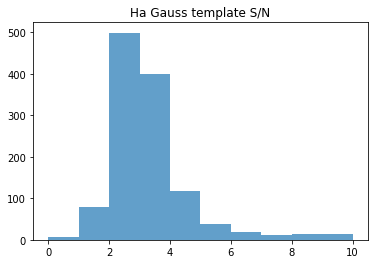

In [9]:
# Gaussian library Ha template (New CC method)
inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
SNRp_best_Ha = np.array([Datacube.CC_SNR_ps_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])


plt.hist(SNR_best_Ha,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("Ha Gauss template S/N")

cond0 = (SNR_best_Ha>8) & (dist_edge>5)  
cond2 = (SNR_best_Ha>5) & (SNR_best_Ha<8) & (SNRp_best_Ha>5) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond0))
print(np.sum(cond2))

print(np.percentile(SNR_best_Ha, 95))
print(np.percentile(SNR_best_Ha, 85))

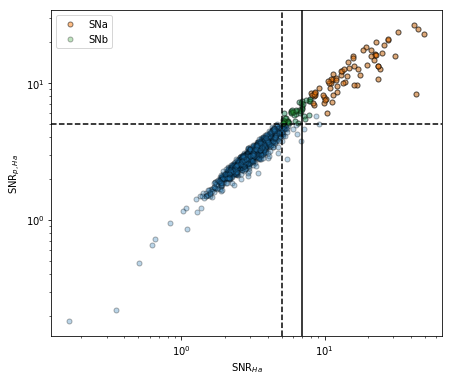

In [26]:
# Ha + Hb
plt.figure(figsize=(7,6))
plt.loglog(SNR_best_Ha, SNRp_best_Ha, ".", ms=10, mec='k', alpha=0.3)
plt.loglog(SNR_best_Ha[cond0], SNRp_best_Ha[cond0], ".", mec='k', ms=10, alpha=0.5, label="SNa")
plt.loglog(SNR_best_Ha[cond2], SNRp_best_Ha[cond2], ".", mec='k', ms=10, alpha=0.3, label="SNb")

plt.axvline(7, ls='-', color='k')
plt.axvline(5, ls='--', color='k')
plt.axhline(5, ls='--', color='k')
plt.xlabel("SNR$_{Ha}$")
plt.ylabel("SNR$_{p,Ha}$")
plt.legend(loc=2)

40
Best z: 0.24479963763117768 Best sigma: 1.328637577476951
SE Object #13  z: 0.245  Peak R: 4.347  Detction S/N: 5.781 Peak S/N: 6.162


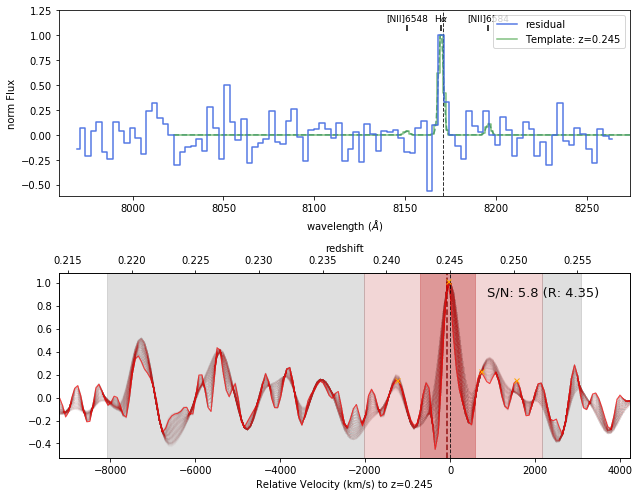

Best z: 0.2195981300531185 Best sigma: 1.328637577476951
SE Object #126  z: 0.220  Peak R: 1.703  Detction S/N: 5.087 Peak S/N: 5.338


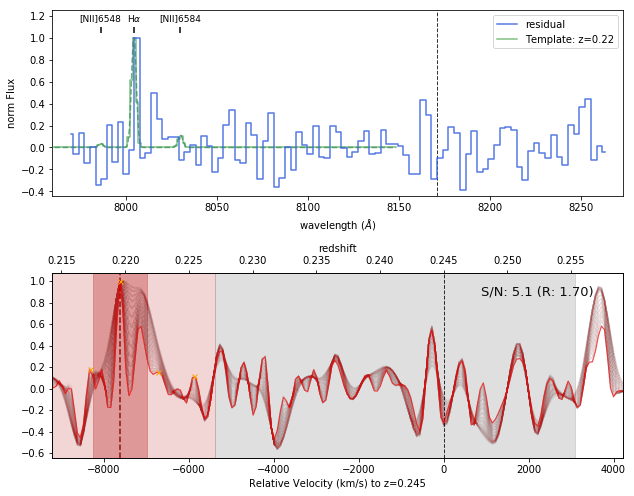

Best z: 0.24833731719689098 Best sigma: 4.901020717193392
SE Object #167  z: 0.248  Peak R: 4.053  Detction S/N: 5.363 Peak S/N: 5.526


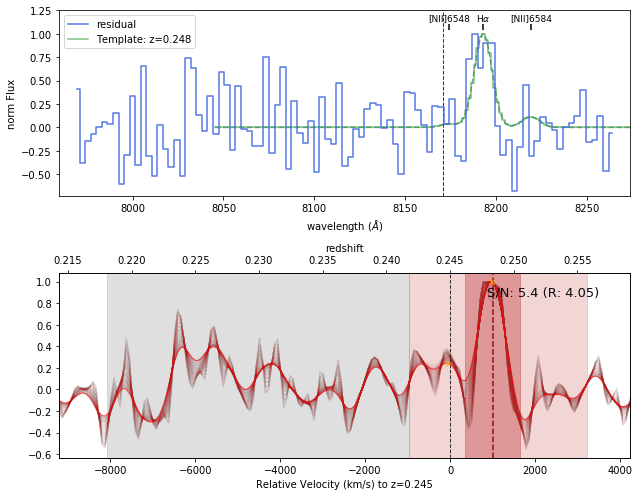

Best z: 0.21817162962417175 Best sigma: 4.901020717193392
SE Object #247  z: 0.218  Peak R: 3.561  Detction S/N: 5.242 Peak S/N: 5.070


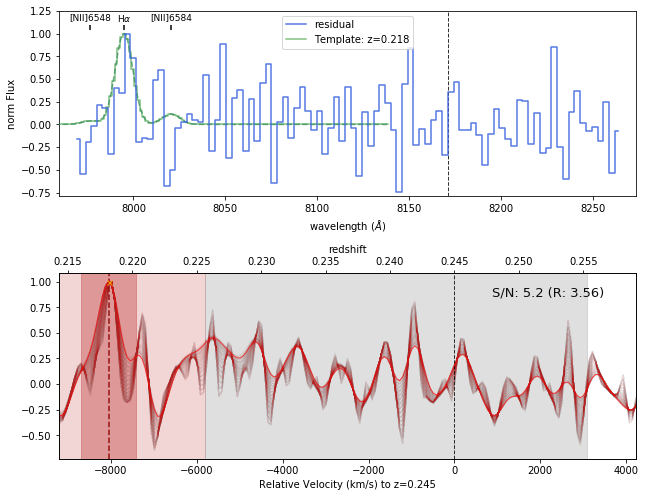

Best z: 0.24691081676794424 Best sigma: 4.901020717193392
SE Object #257  z: 0.247  Peak R: 3.982  Detction S/N: 5.230 Peak S/N: 6.067


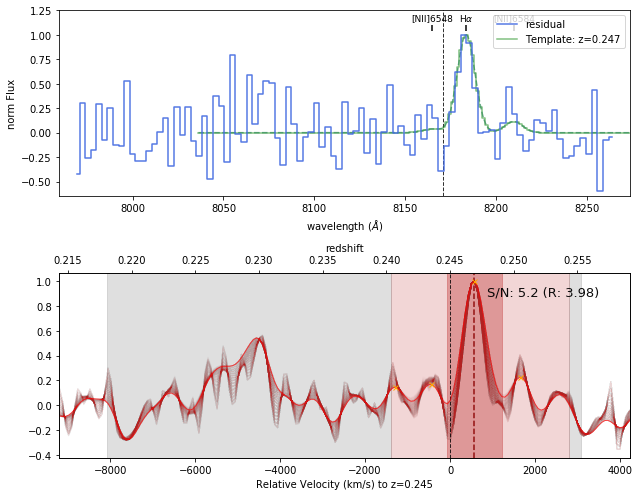

Best z: 0.24619756655347086 Best sigma: 2.859658923069711
SE Object #264  z: 0.246  Peak R: 2.422  Detction S/N: 6.676 Peak S/N: 6.358


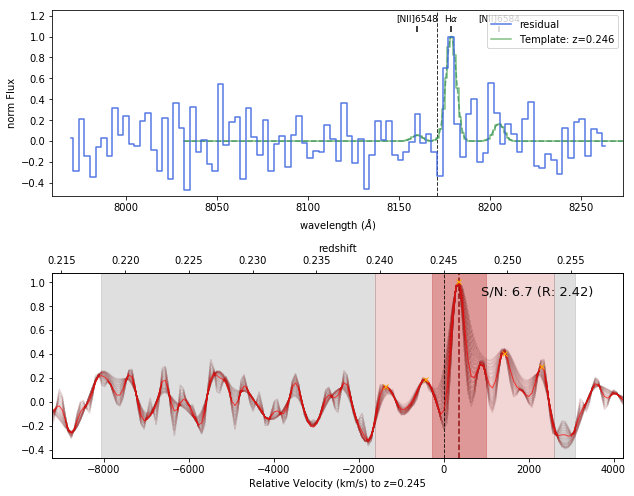

Best z: 0.24551288784565106 Best sigma: 3.369999371600631
SE Object #274  z: 0.246  Peak R: 2.057  Detction S/N: 7.183 Peak S/N: 5.690


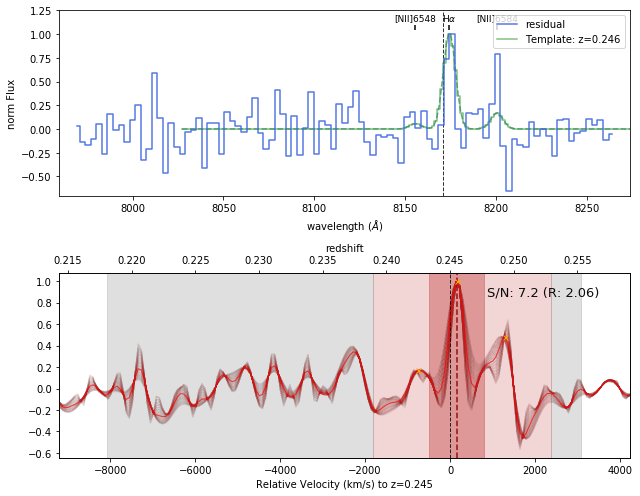

Best z: 0.2457506379171422 Best sigma: 1.328637577476951
SE Object #313  z: 0.246  Peak R: 2.207  Detction S/N: 7.830 Peak S/N: 7.416


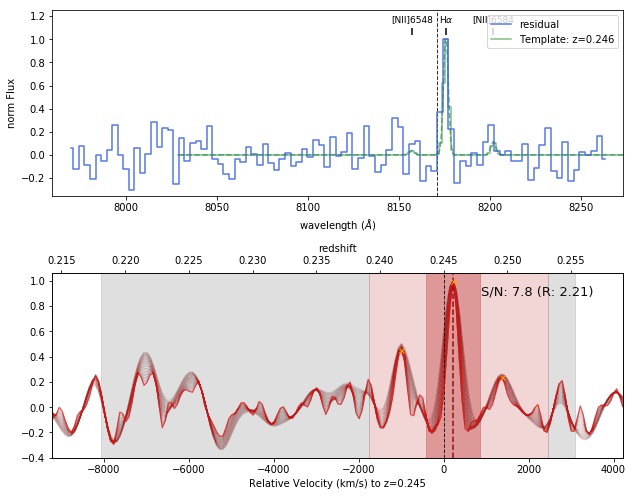

Best z: 0.2183808081890093 Best sigma: 2.094148250273331
SE Object #338  z: 0.218  Peak R: 2.377  Detction S/N: 6.318 Peak S/N: 5.968


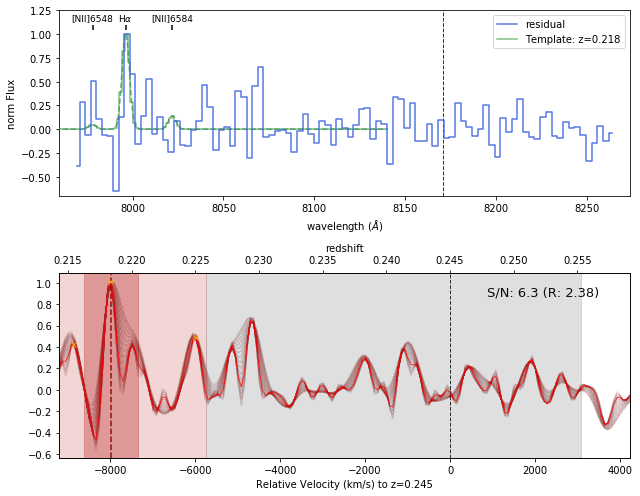

Best z: 0.21840937969566288 Best sigma: 4.645850492927932
SE Object #344  z: 0.218  Peak R: 8.356  Detction S/N: 7.004 Peak S/N: 6.563


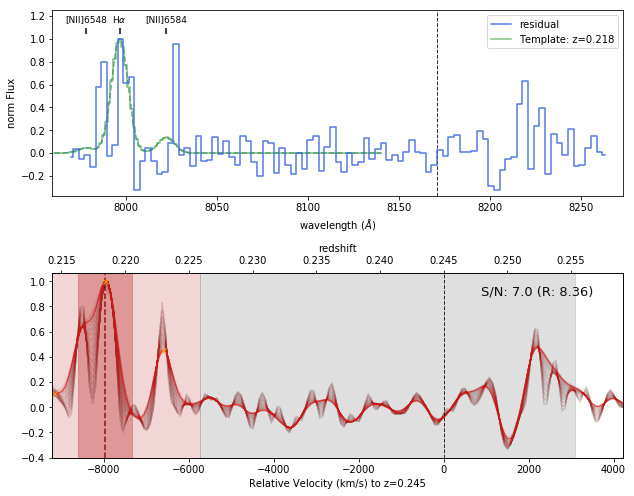

Best z: 0.2457220664104886 Best sigma: 1.328637577476951
SE Object #455  z: 0.246  Peak R: 3.996  Detction S/N: 6.932 Peak S/N: 6.809


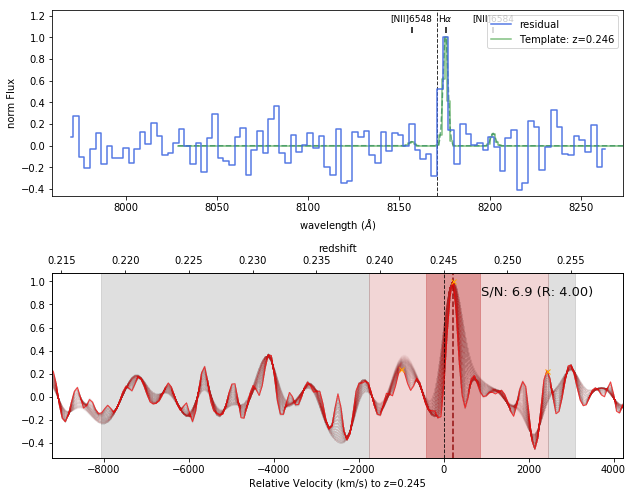

Best z: 0.22007363019610074 Best sigma: 3.8803398201315513
SE Object #468  z: 0.220  Peak R: 4.061  Detction S/N: 6.340 Peak S/N: 6.287


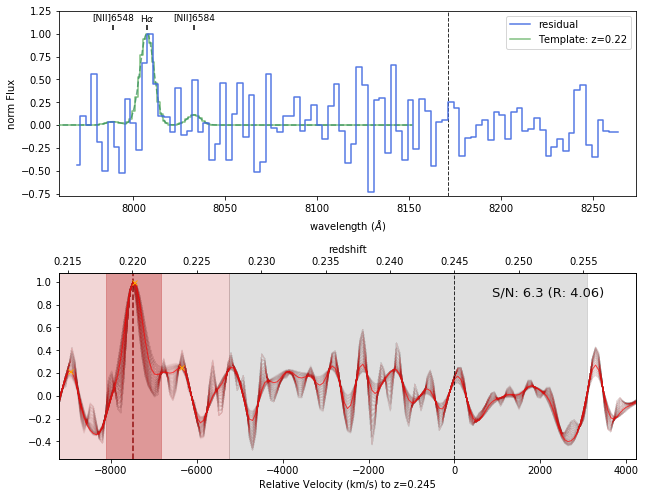

Best z: 0.21722062933820727 Best sigma: 1.328637577476951
SE Object #470  z: 0.217  Peak R: 1.426  Detction S/N: 7.289 Peak S/N: 5.487


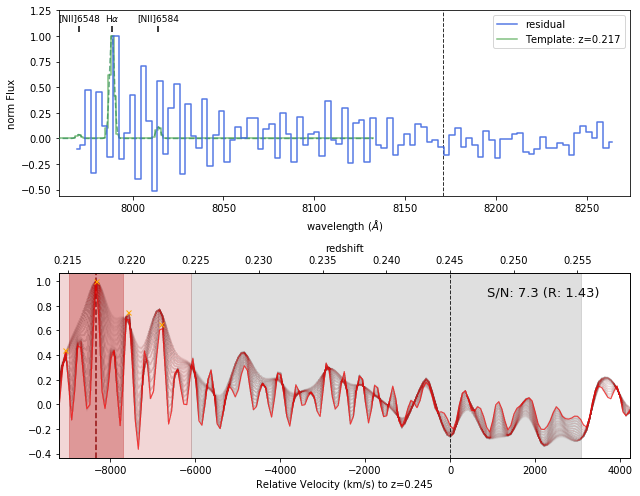

Best z: 0.24072931490917499 Best sigma: 2.6044886988042513
SE Object #499  z: 0.241  Peak R: 3.924  Detction S/N: 5.799 Peak S/N: 6.248


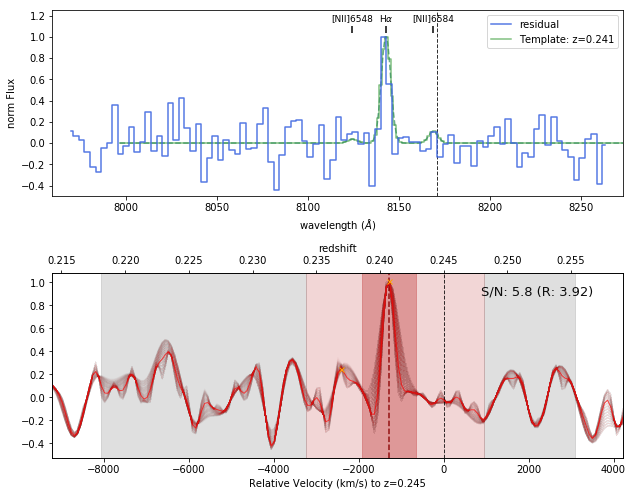

Best z: 0.24928831748285546 Best sigma: 2.6044886988042513
SE Object #501  z: 0.249  Peak R: 2.995  Detction S/N: 6.161 Peak S/N: 5.830


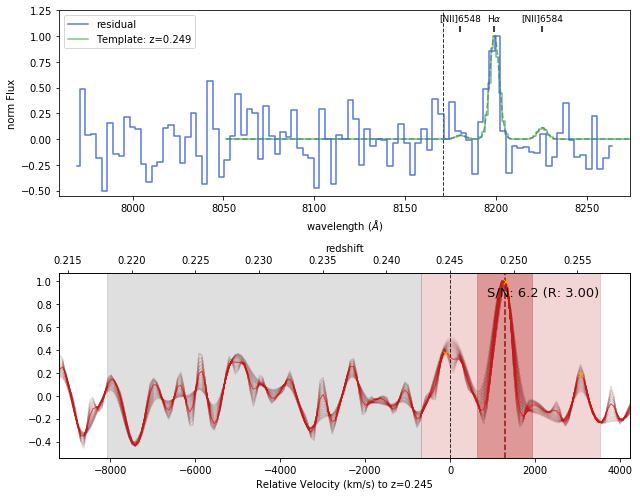

Best z: 0.24765263848907118 Best sigma: 1.328637577476951
SE Object #512  z: 0.248  Peak R: 3.462  Detction S/N: 6.273 Peak S/N: 6.343


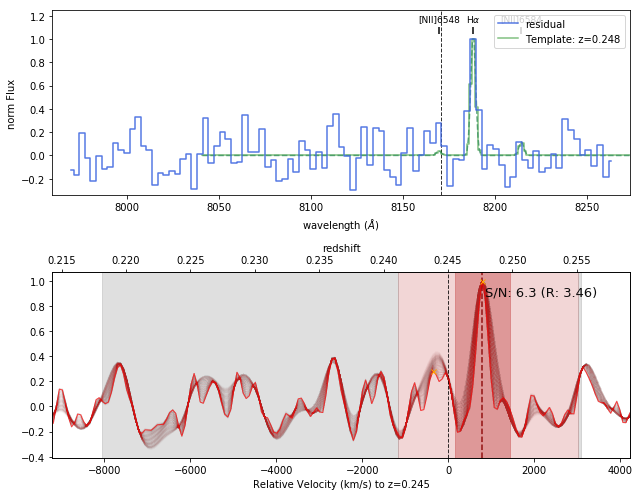

Best z: 0.2478903885605623 Best sigma: 3.114829147335171
SE Object #517  z: 0.248  Peak R: 5.133  Detction S/N: 5.430 Peak S/N: 5.309


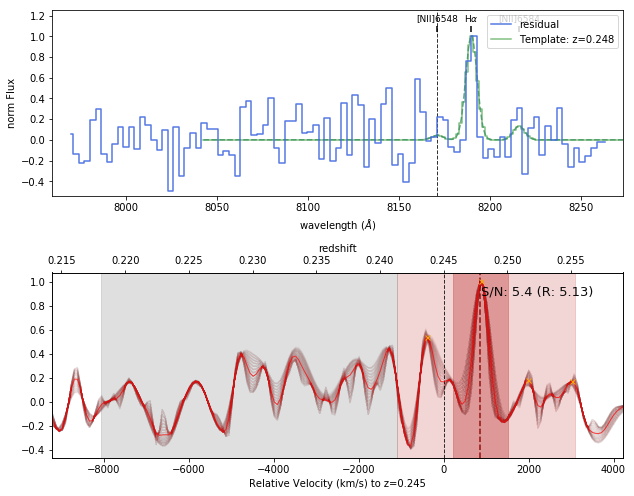

Best z: 0.24741488841758005 Best sigma: 4.901020717193392
SE Object #526  z: 0.247  Peak R: 5.547  Detction S/N: 5.801 Peak S/N: 6.069


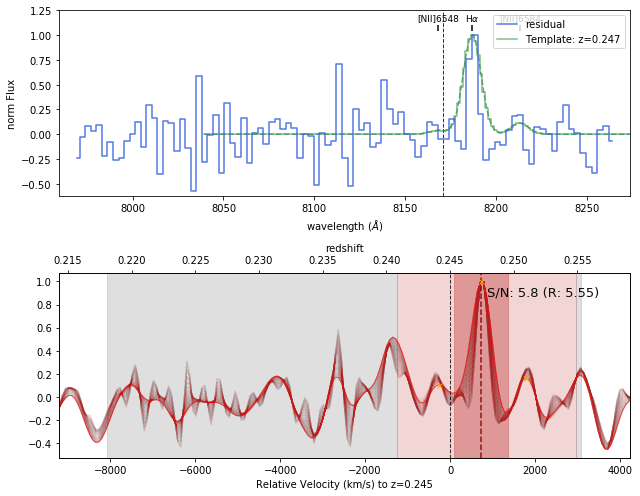

Best z: 0.24548431633899748 Best sigma: 2.6044886988042513
SE Object #533  z: 0.245  Peak R: 4.050  Detction S/N: 5.522 Peak S/N: 5.280


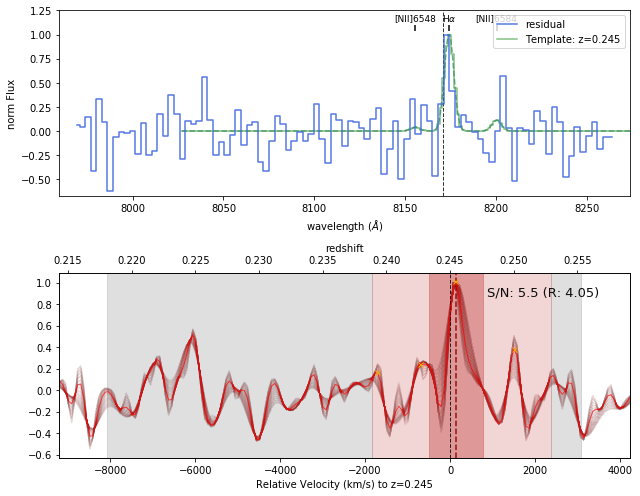

Best z: 0.2504770678403111 Best sigma: 2.859658923069711
SE Object #548  z: 0.250  Peak R: 3.547  Detction S/N: 7.362 Peak S/N: 7.537


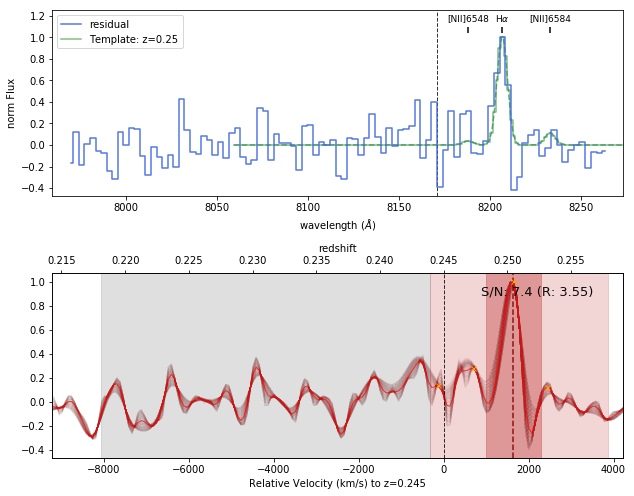

Best z: 0.23312131262145902 Best sigma: 2.6044886988042513
SE Object #555  z: 0.233  Peak R: 3.113  Detction S/N: 7.905 Peak S/N: 7.404


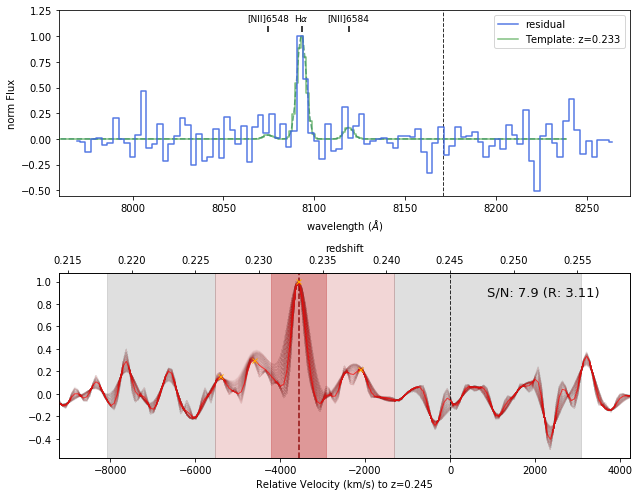

Best z: 0.24691081676794424 Best sigma: 3.369999371600631
SE Object #569  z: 0.247  Peak R: 4.062  Detction S/N: 6.632 Peak S/N: 7.299


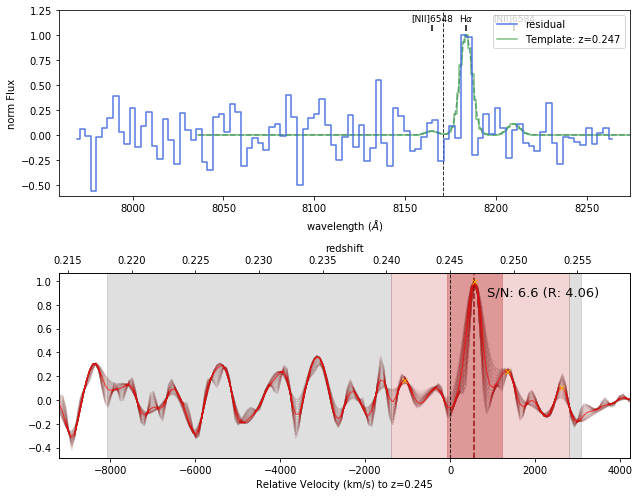

Best z: 0.2504770678403111 Best sigma: 2.859658923069711
SE Object #585  z: 0.250  Peak R: 8.338  Detction S/N: 5.280 Peak S/N: 5.547


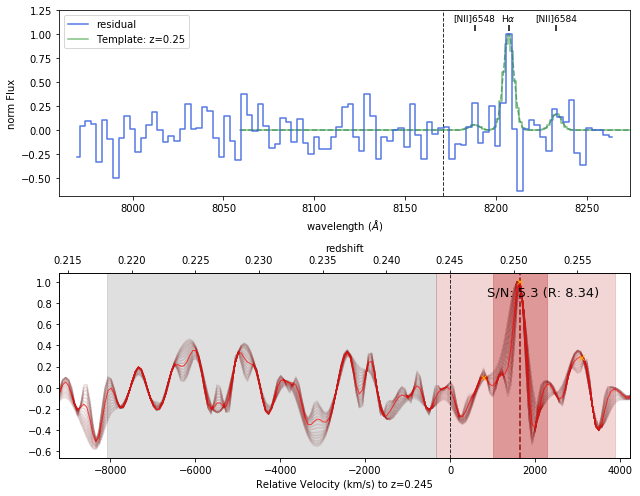

Best z: 0.2467016382031067 Best sigma: 3.114829147335171
SE Object #588  z: 0.247  Peak R: 1.752  Detction S/N: 6.232 Peak S/N: 5.255


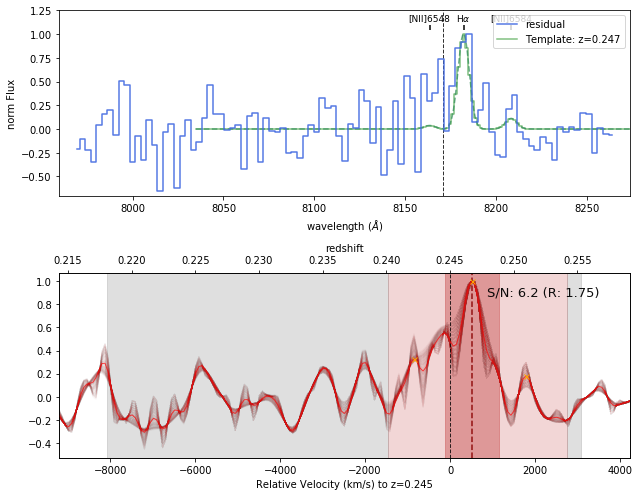

Best z: 0.24191806526663062 Best sigma: 1.328637577476951
SE Object #589  z: 0.242  Peak R: 3.204  Detction S/N: 5.874 Peak S/N: 6.350


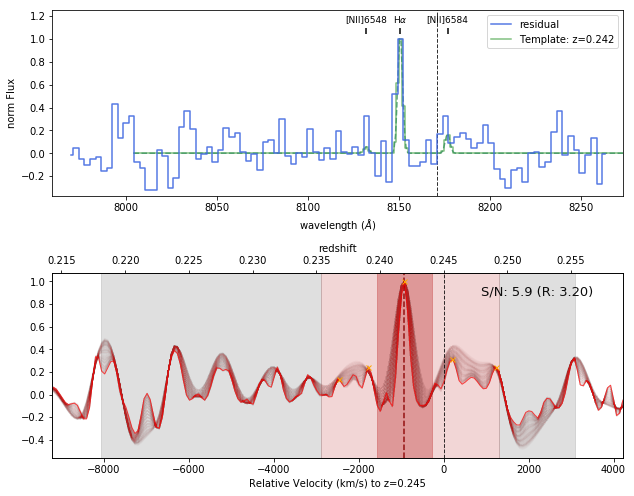

Best z: 0.24408638741670433 Best sigma: 4.901020717193392
SE Object #610  z: 0.244  Peak R: 3.707  Detction S/N: 6.954 Peak S/N: 6.408


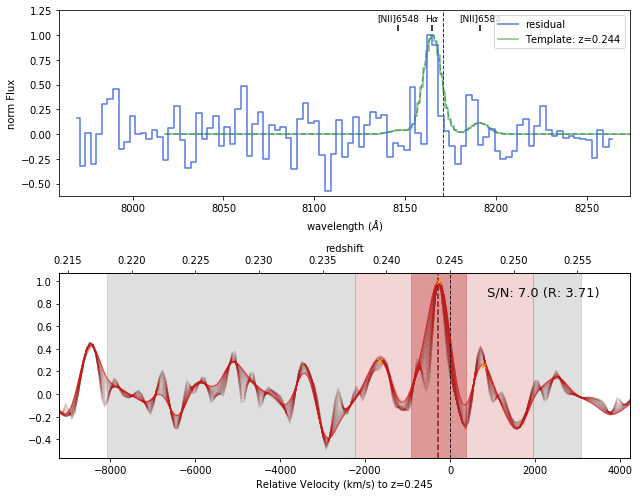

Best z: 0.2571340698420626 Best sigma: 3.8803398201315513
SE Object #619  z: 0.257  Peak R: 2.911  Detction S/N: 6.040 Peak S/N: 6.168


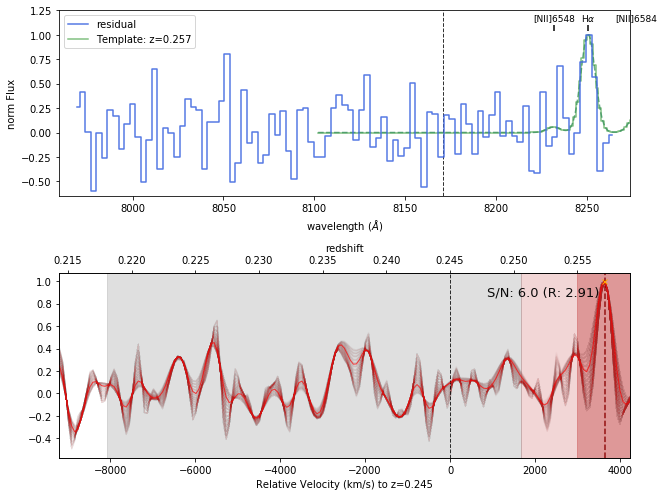

Best z: 0.24717713834608893 Best sigma: 2.094148250273331
SE Object #620  z: 0.247  Peak R: 1.000  Detction S/N: 6.828 Peak S/N: 7.091


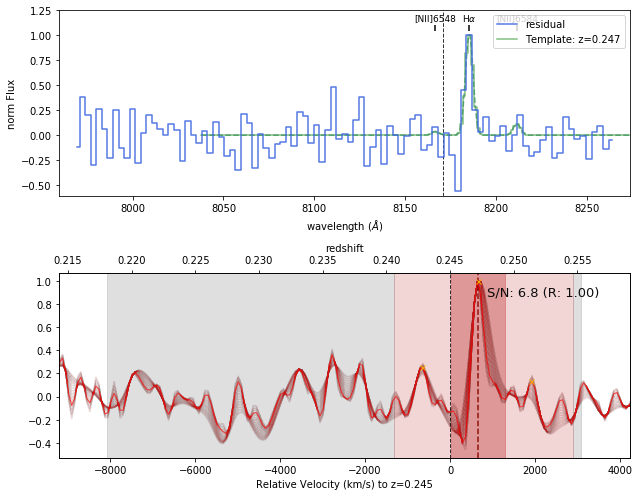

Best z: 0.22670206069119864 Best sigma: 1.328637577476951
SE Object #647  z: 0.227  Peak R: 1.923  Detction S/N: 6.691 Peak S/N: 6.043


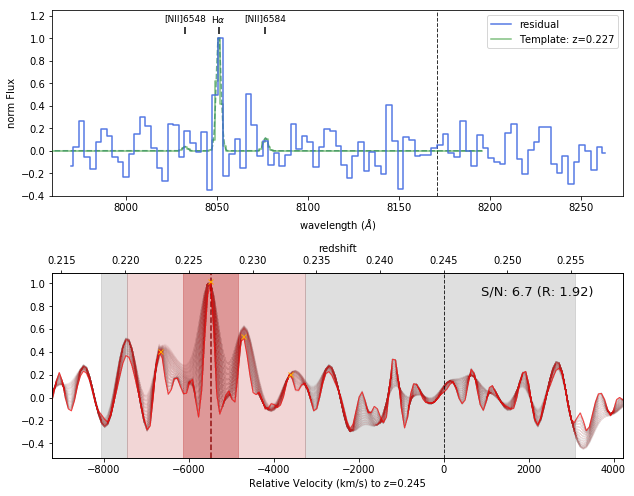

Best z: 0.24263131548110398 Best sigma: 4.901020717193392
SE Object #732  z: 0.243  Peak R: 2.483  Detction S/N: 5.520 Peak S/N: 5.155


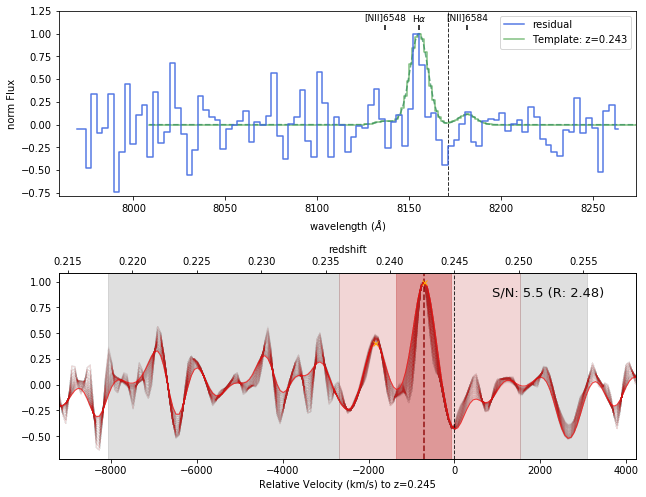

Best z: 0.24527513777415993 Best sigma: 4.901020717193392
SE Object #795  z: 0.245  Peak R: 3.927  Detction S/N: 5.670 Peak S/N: 5.062


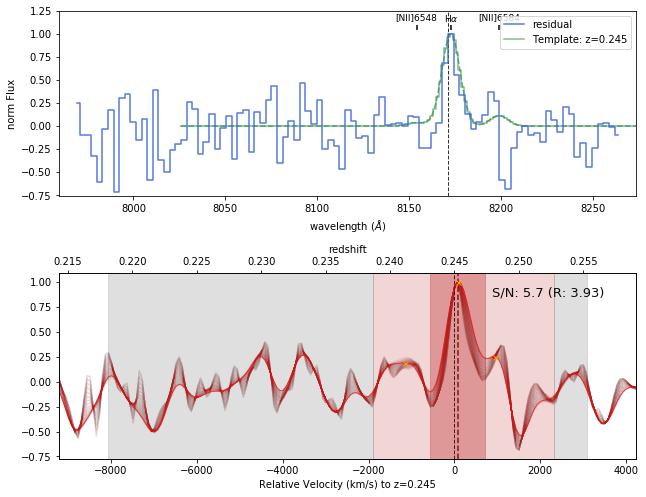

Best z: 0.22078688041057412 Best sigma: 4.645850492927932
SE Object #857  z: 0.221  Peak R: 6.048  Detction S/N: 5.093 Peak S/N: 5.070


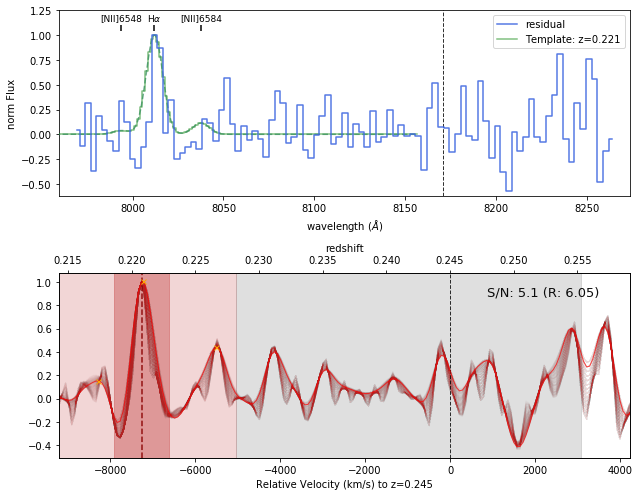

Best z: 0.22696838226934335 Best sigma: 4.901020717193392
SE Object #887  z: 0.227  Peak R: 3.965  Detction S/N: 5.220 Peak S/N: 5.304


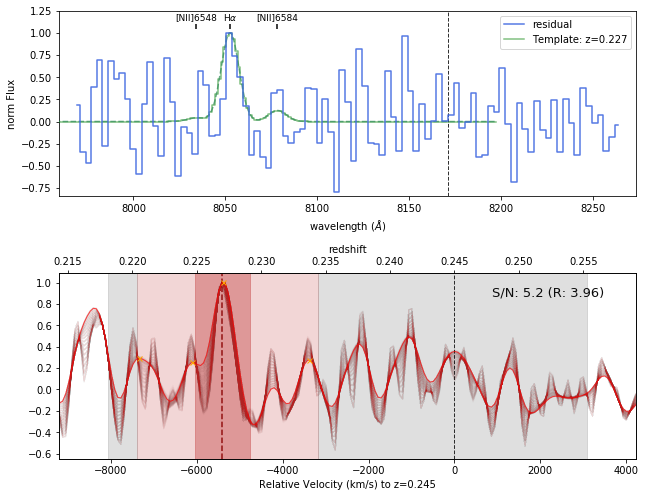

Best z: 0.24786181705390872 Best sigma: 4.901020717193392
SE Object #946  z: 0.248  Peak R: 1.371  Detction S/N: 6.508 Peak S/N: 5.087


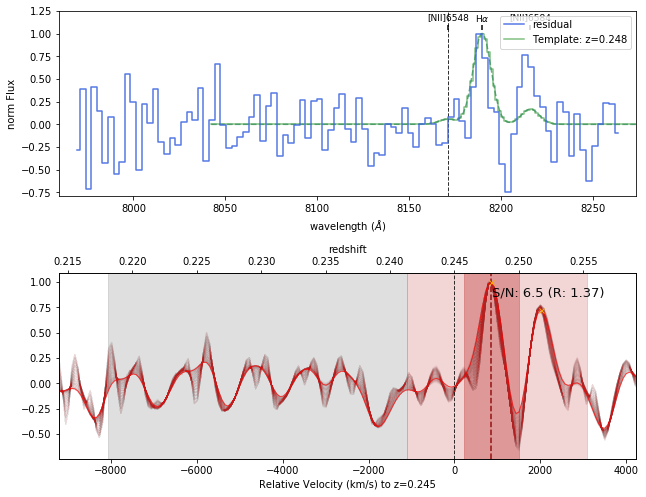

Best z: 0.2486036387750357 Best sigma: 2.859658923069711
SE Object #973  z: 0.249  Peak R: 9.830  Detction S/N: 6.901 Peak S/N: 7.387


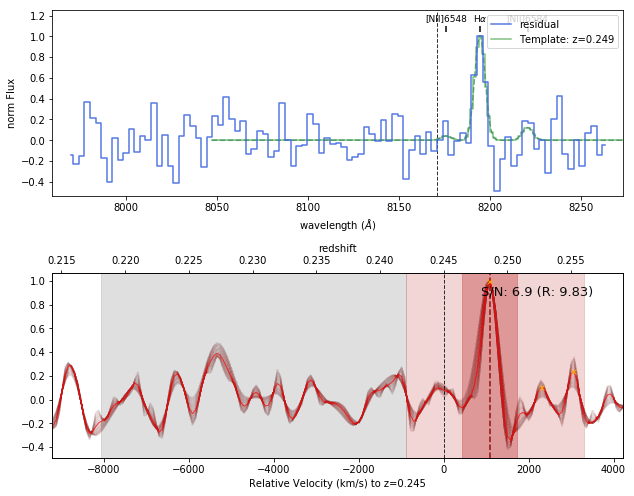

Best z: 0.24646388813161557 Best sigma: 4.901020717193392
SE Object #1077  z: 0.246  Peak R: 4.428  Detction S/N: 7.849 Peak S/N: 7.691


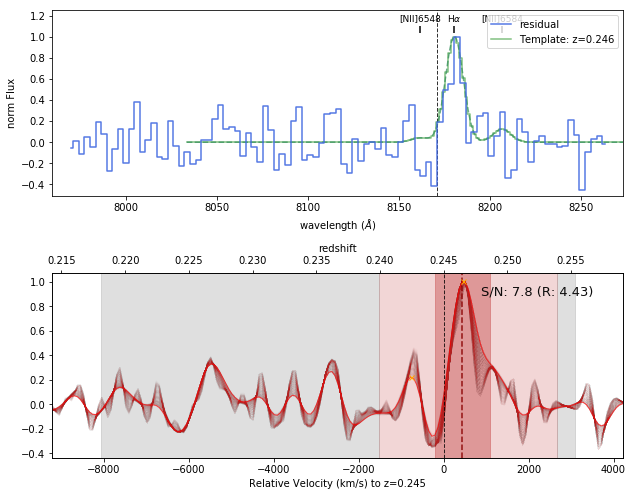

Best z: 0.24456188755968655 Best sigma: 4.645850492927932
SE Object #1086  z: 0.245  Peak R: 3.727  Detction S/N: 7.793 Peak S/N: 5.845


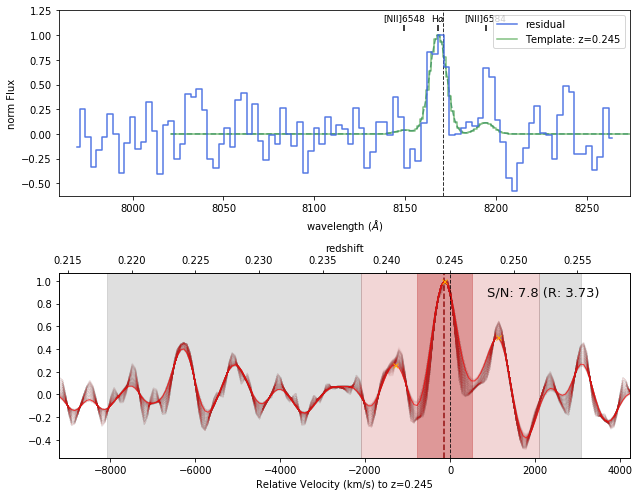

Best z: 0.24619756655347086 Best sigma: 2.349318474538791
SE Object #1110  z: 0.246  Peak R: 4.121  Detction S/N: 6.879 Peak S/N: 6.278


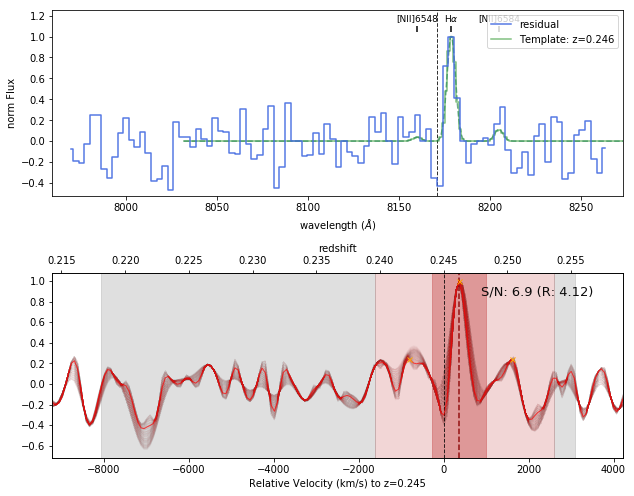

Best z: 0.24714856683943534 Best sigma: 1.328637577476951
SE Object #1140  z: 0.247  Peak R: 3.148  Detction S/N: 7.099 Peak S/N: 7.031


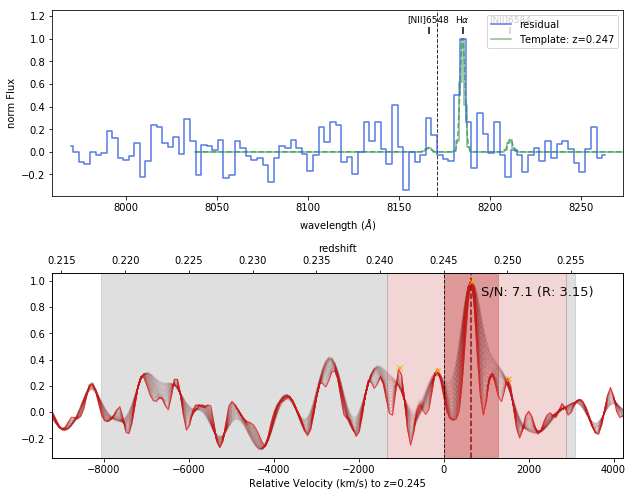

Best z: 0.24239356540961288 Best sigma: 1.328637577476951
SE Object #1202  z: 0.242  Peak R: 2.531  Detction S/N: 5.139 Peak S/N: 5.090


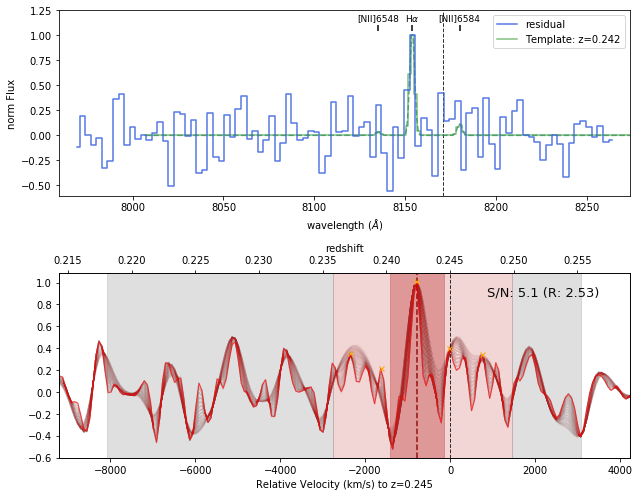

In [29]:
cond = cond2
print(np.sum(cond))
for j, (cc_num) in enumerate(Datacube.cc_nums[cond]):
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num)
    plt.savefig("./A2465C/fig/xcorr_v2/SNb/CC#%d.png"%(cc_num), dpi=150)
    plt.show()
    plt.close()

35


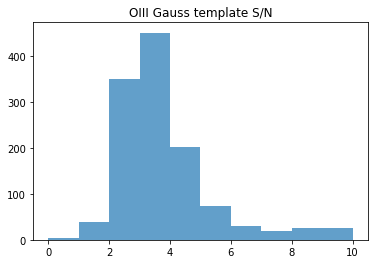

In [17]:
# Gaussian library Hb template (New CC method)
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

plt.hist(SNR_best_Hb,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("OIII Gauss template S/N")

cond_b = (SNR_best_Hb>6) & (SNR_best_Ha>3) & (SNR_best_Ha<6) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond_b))

35
Best z: 0.6316354308386958 Best sigma: 3.369999371600631
SE Object #4  z: 0.632  Peak R: 1.999  Detction S/N: 6.950 Peak S/N: 6.950


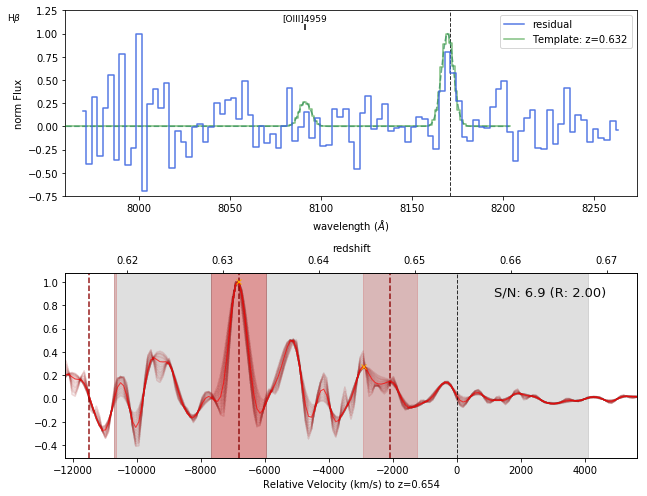

Best z: 0.6313574719561227 Best sigma: 1.583807801742411
SE Object #13  z: 0.631  Peak R: 5.541  Detction S/N: 9.523 Peak S/N: 9.523


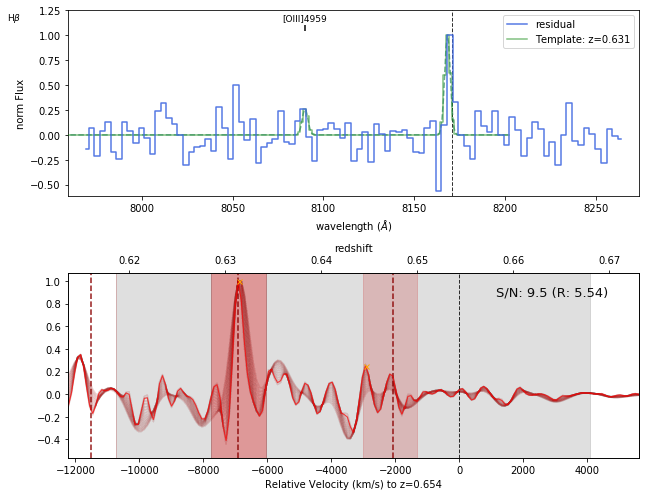

Best z: 0.6199666377565067 Best sigma: 3.369999371600631
SE Object #25  z: 0.620  Peak R: 9.501  Detction S/N: 6.578 Peak S/N: 6.578


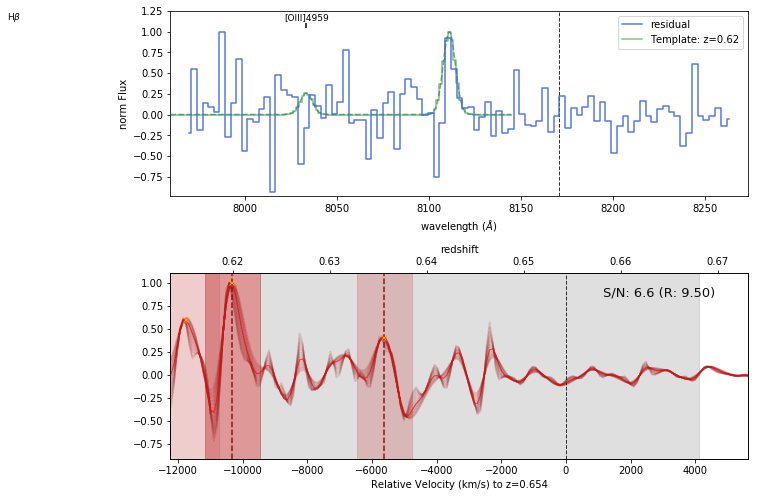

Best z: 0.6357804223648588 Best sigma: 4.901020717193392
SE Object #167  z: 0.636  Peak R: 1.000  Detction S/N: 8.577 Peak S/N: 8.577


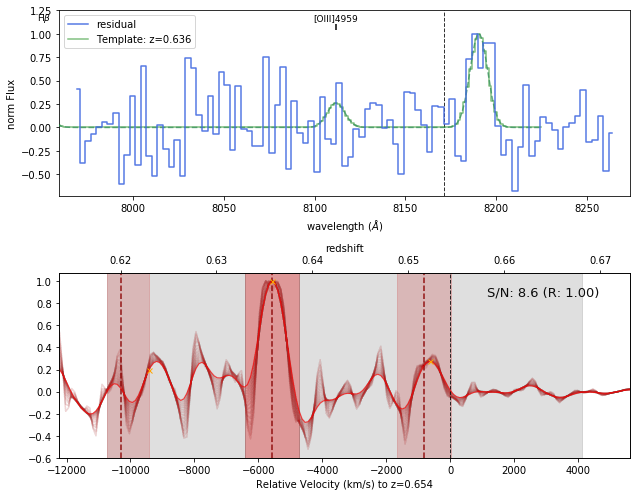

Best z: 0.6199666377565067 Best sigma: 4.901020717193392
SE Object #174  z: 0.620  Peak R: 3.827  Detction S/N: 6.482 Peak S/N: 6.482


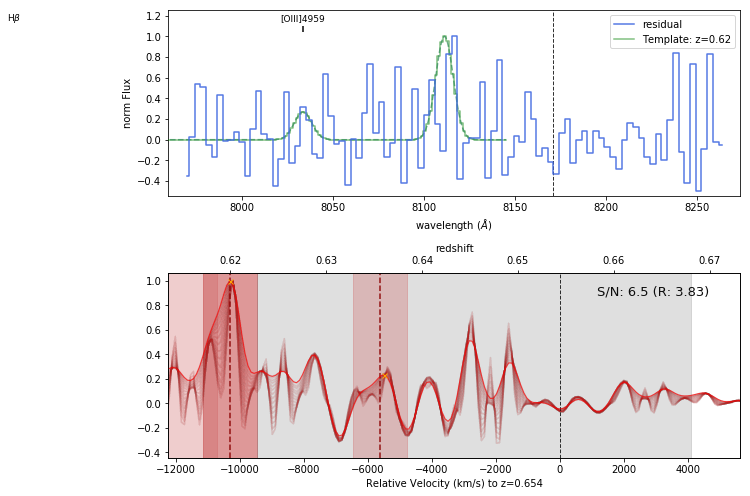

Best z: 0.6237601990801299 Best sigma: 4.901020717193392
SE Object #211  z: 0.624  Peak R: 1.775  Detction S/N: 6.089 Peak S/N: 6.089


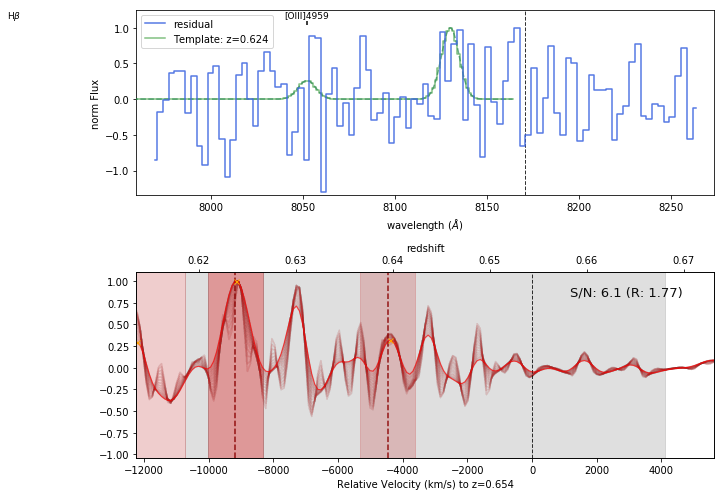

Best z: 0.6342007972188816 Best sigma: 2.349318474538791
SE Object #249  z: 0.634  Peak R: 8.260  Detction S/N: 6.216 Peak S/N: 6.216


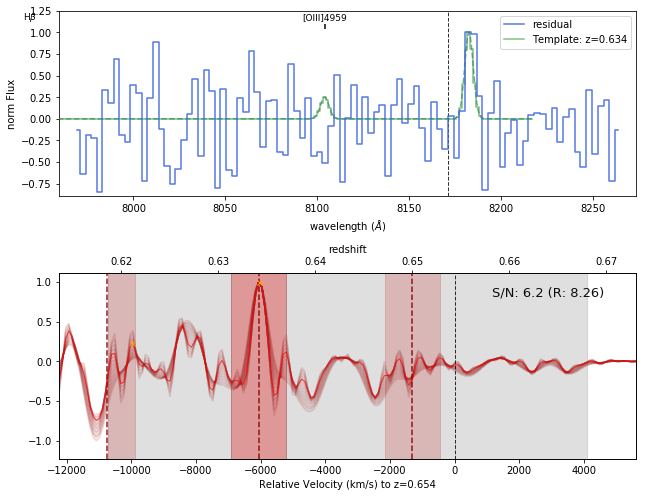

Best z: 0.6341628310722592 Best sigma: 4.901020717193392
SE Object #257  z: 0.634  Peak R: 4.622  Detction S/N: 10.118 Peak S/N: 10.118


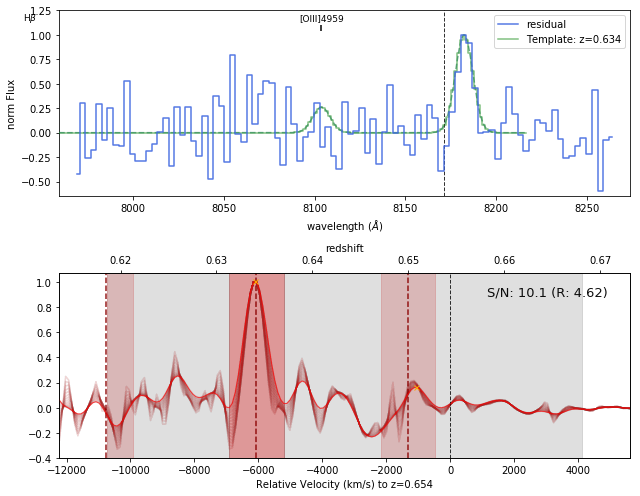

Best z: 0.6278822966349729 Best sigma: 4.3906802686624715
SE Object #289  z: 0.628  Peak R: 9.741  Detction S/N: 6.586 Peak S/N: 6.586


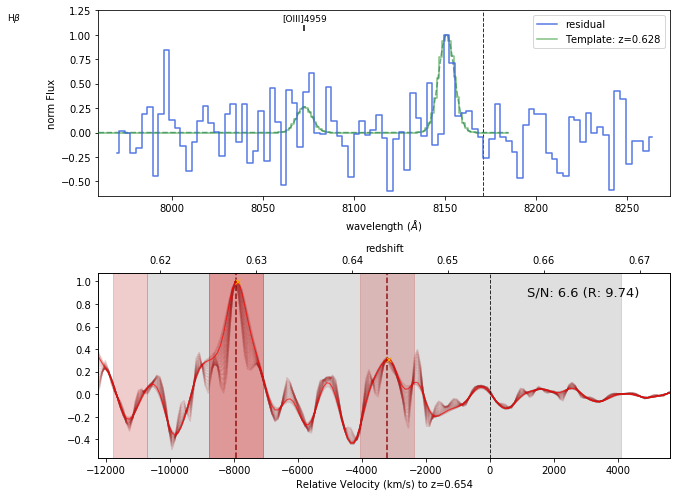

Best z: 0.6253169302547871 Best sigma: 2.6044886988042513
SE Object #342  z: 0.625  Peak R: 4.318  Detction S/N: 6.572 Peak S/N: 6.572


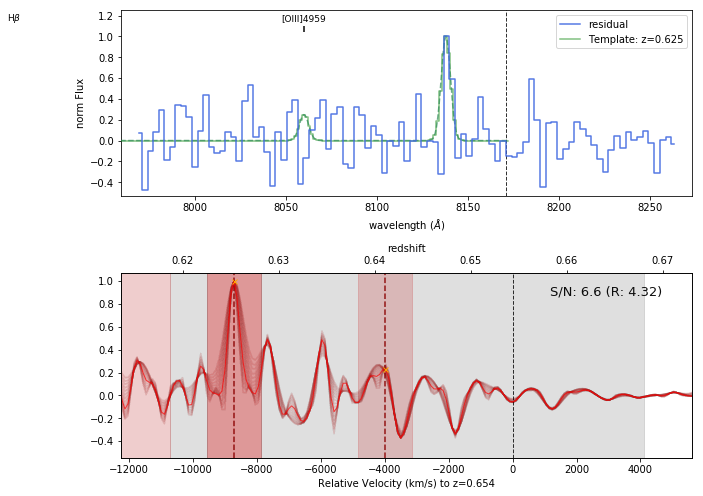

Best z: 0.6319513558678912 Best sigma: 1.328637577476951
SE Object #365  z: 0.632  Peak R: 1.995  Detction S/N: 6.523 Peak S/N: 6.523


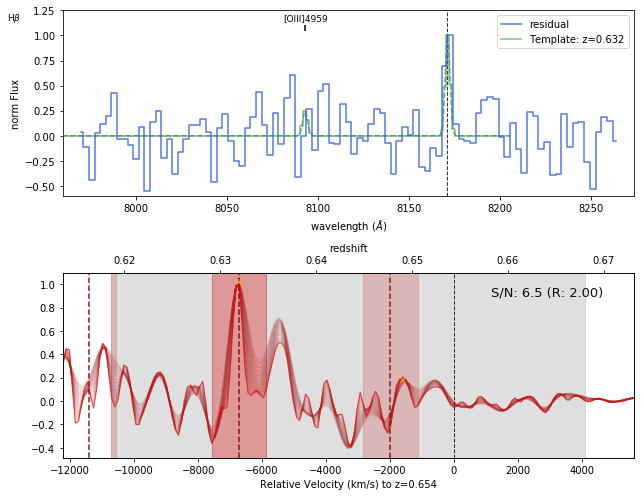

Best z: 0.6212315085656988 Best sigma: 4.645850492927932
SE Object #367  z: 0.621  Peak R: 7.822  Detction S/N: 6.339 Peak S/N: 6.339


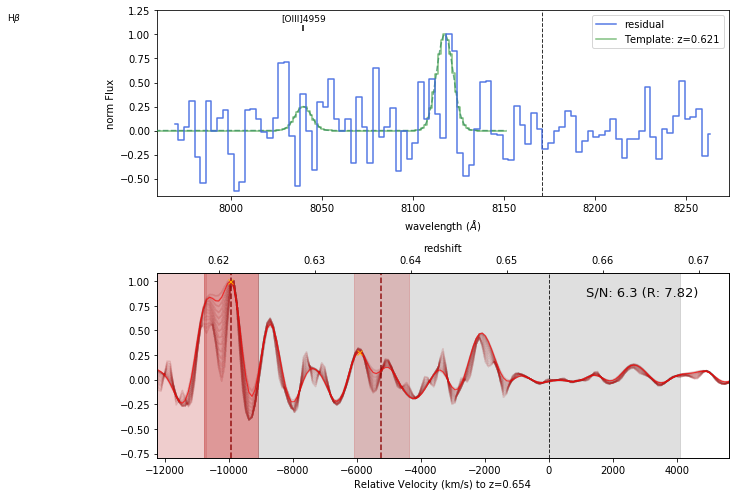

Best z: 0.6256708214306048 Best sigma: 2.349318474538791
SE Object #499  z: 0.626  Peak R: 5.409  Detction S/N: 8.241 Peak S/N: 8.241


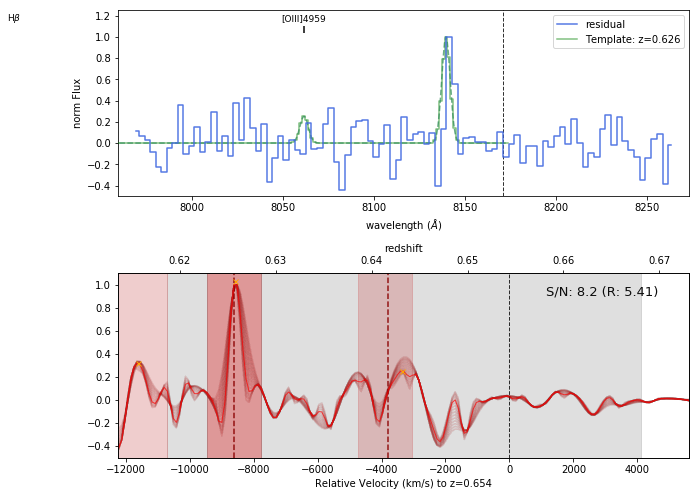

Best z: 0.6354644973356632 Best sigma: 4.135510044397011
SE Object #517  z: 0.635  Peak R: 5.693  Detction S/N: 6.158 Peak S/N: 6.158


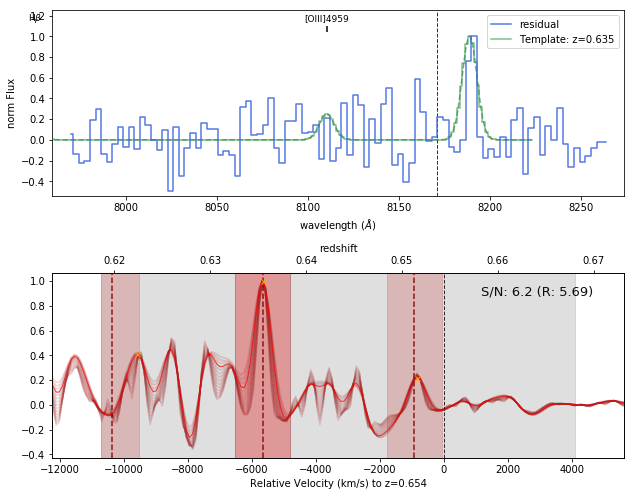

Best z: 0.6310035807803048 Best sigma: 4.645850492927932
SE Object #521  z: 0.631  Peak R: 7.773  Detction S/N: 6.225 Peak S/N: 6.225


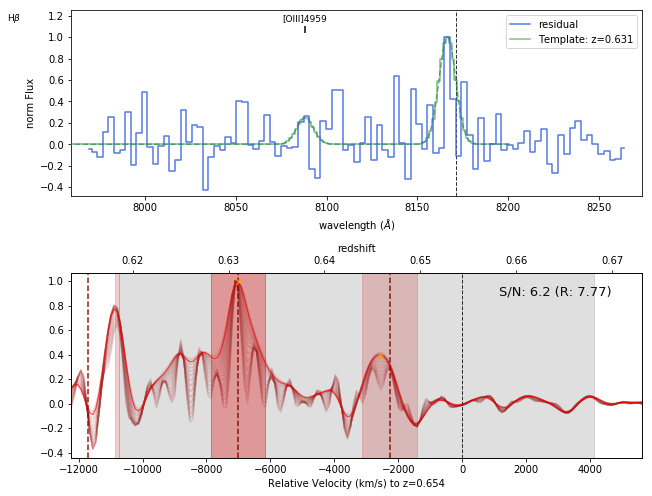

Best z: 0.6348326472772724 Best sigma: 4.901020717193392
SE Object #526  z: 0.635  Peak R: 6.465  Detction S/N: 6.617 Peak S/N: 6.617


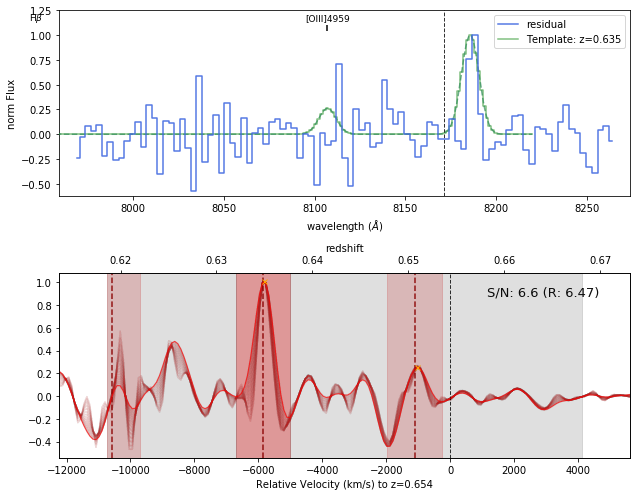

Best z: 0.6323052470437089 Best sigma: 4.901020717193392
SE Object #533  z: 0.632  Peak R: 6.712  Detction S/N: 7.117 Peak S/N: 7.117


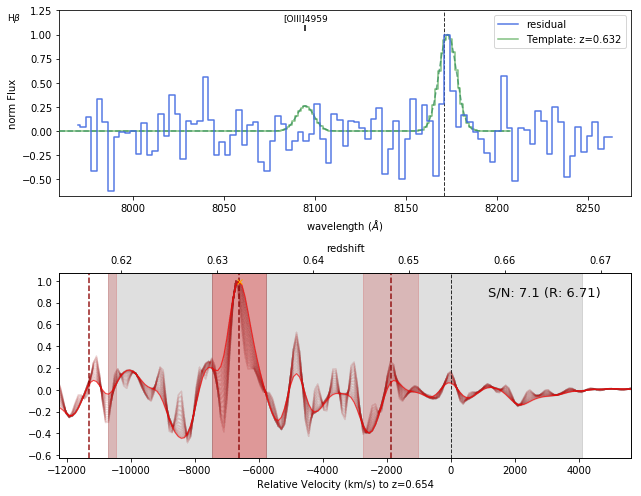

Best z: 0.6300558056927186 Best sigma: 4.645850492927932
SE Object #542  z: 0.630  Peak R: 1.466  Detction S/N: 6.044 Peak S/N: 6.044


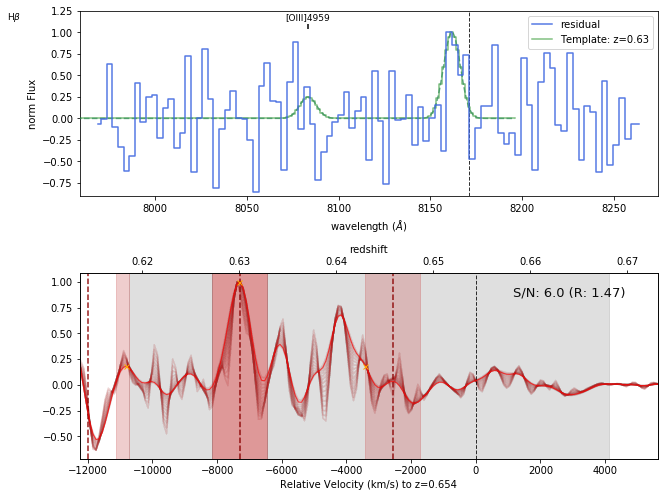

Best z: 0.6351485723064678 Best sigma: 4.901020717193392
SE Object #545  z: 0.635  Peak R: 3.590  Detction S/N: 8.676 Peak S/N: 8.676


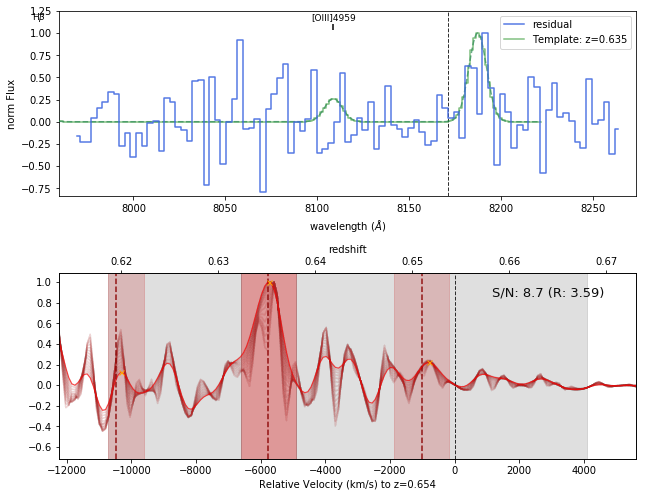

Best z: 0.6310035807803048 Best sigma: 1.328637577476951
SE Object #578  z: 0.631  Peak R: 5.876  Detction S/N: 6.421 Peak S/N: 6.421


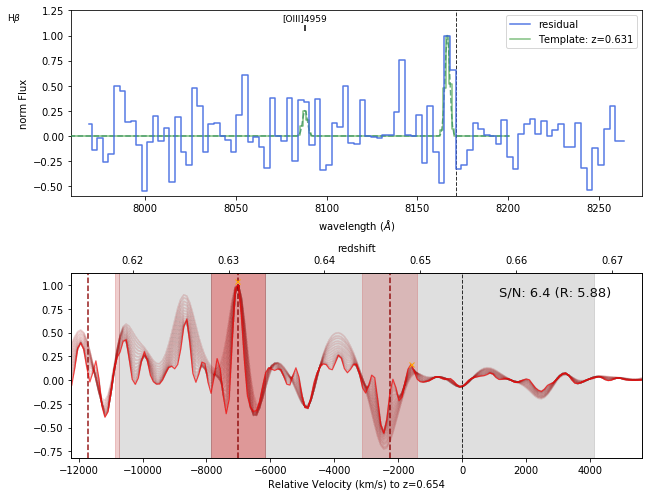

Best z: 0.6389017065101907 Best sigma: 1.328637577476951
SE Object #585  z: 0.639  Peak R: 1.009  Detction S/N: 6.919 Peak S/N: 6.919


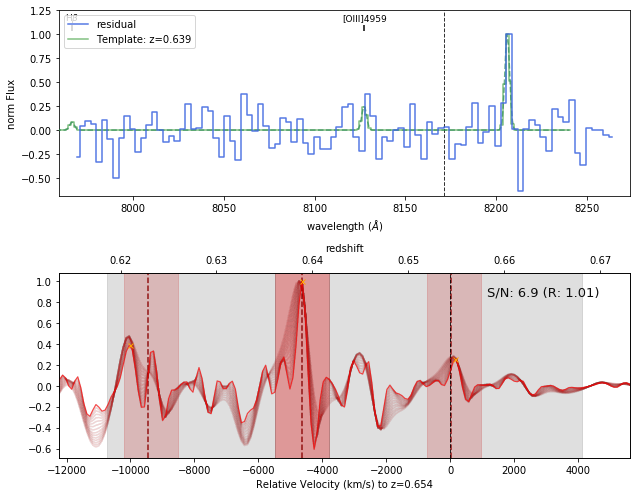

Best z: 0.6275284054591551 Best sigma: 1.328637577476951
SE Object #589  z: 0.628  Peak R: 3.465  Detction S/N: 7.482 Peak S/N: 7.482


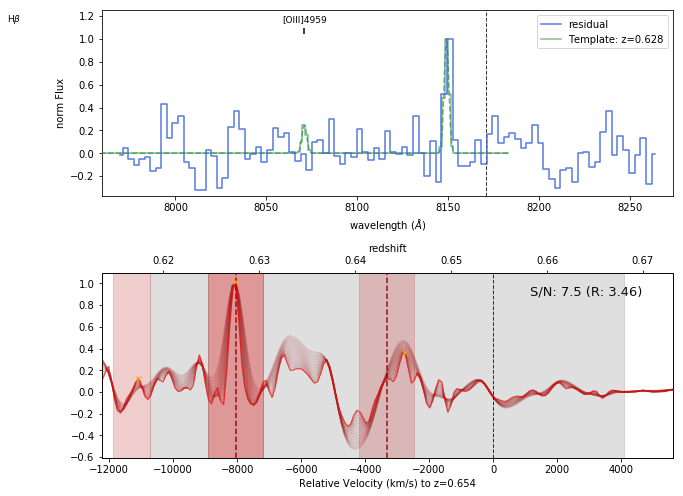

Best z: 0.6323052470437089 Best sigma: 2.6044886988042513
SE Object #658  z: 0.632  Peak R: 3.053  Detction S/N: 7.334 Peak S/N: 7.334


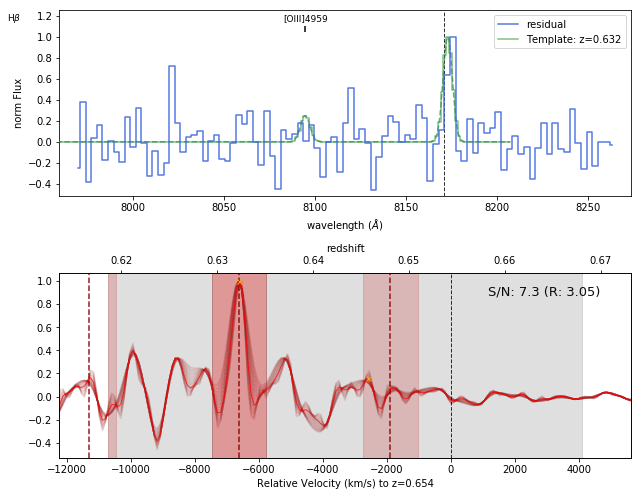

Best z: 0.6348326472772724 Best sigma: 2.094148250273331
SE Object #664  z: 0.635  Peak R: 4.072  Detction S/N: 6.413 Peak S/N: 6.413


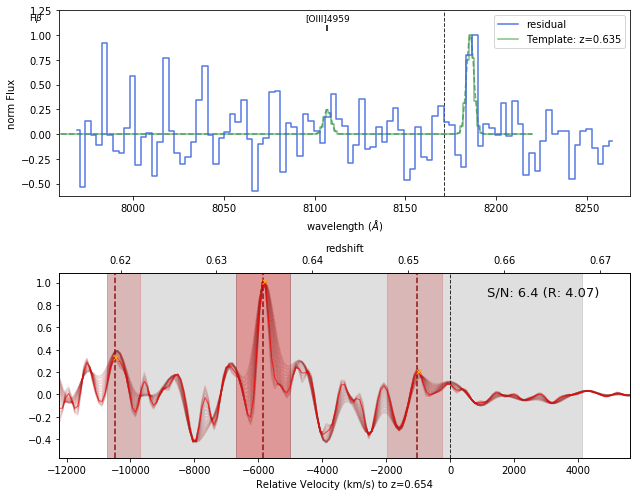

Best z: 0.6291080306051323 Best sigma: 2.6044886988042513
SE Object #671  z: 0.629  Peak R: 8.441  Detction S/N: 8.399 Peak S/N: 8.399


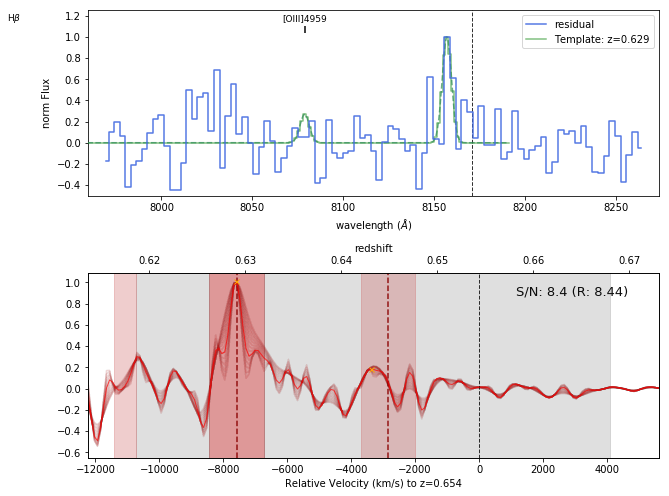

Best z: 0.6284761805467414 Best sigma: 2.094148250273331
SE Object #732  z: 0.628  Peak R: 9.873  Detction S/N: 7.646 Peak S/N: 7.646


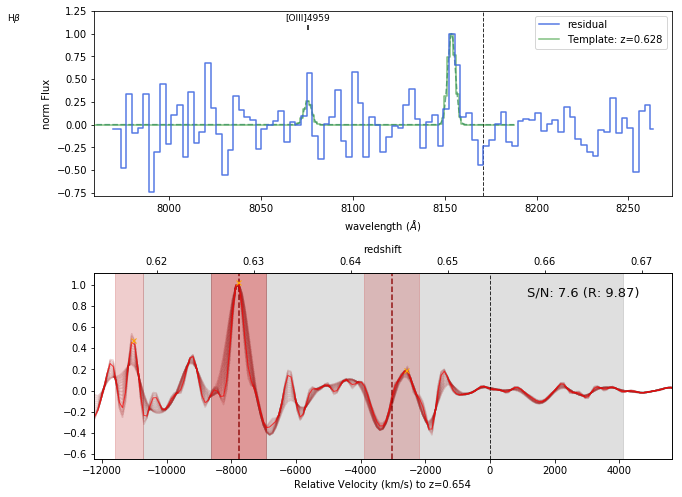

Best z: 0.6319513558678912 Best sigma: 1.328637577476951
SE Object #751  z: 0.632  Peak R: 9.124  Detction S/N: 8.600 Peak S/N: 8.600


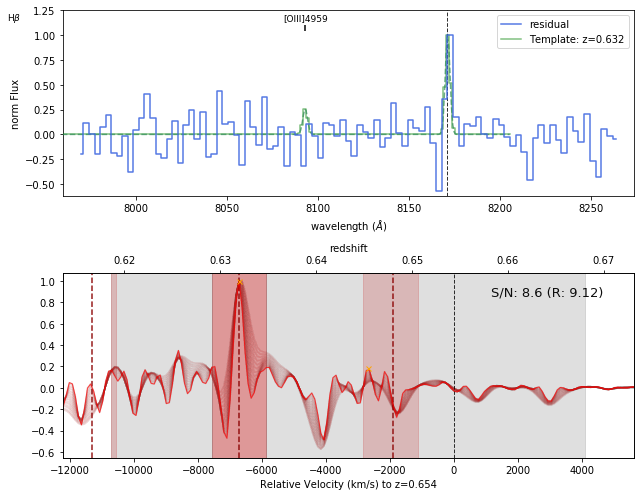

Best z: 0.6442724320065131 Best sigma: 4.901020717193392
SE Object #793  z: 0.644  Peak R: 3.849  Detction S/N: 6.333 Peak S/N: 6.333


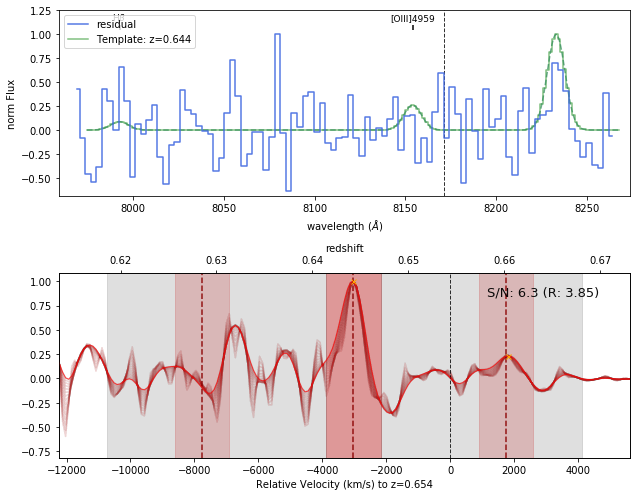

Best z: 0.6319893220145135 Best sigma: 4.901020717193392
SE Object #795  z: 0.632  Peak R: 7.665  Detction S/N: 7.190 Peak S/N: 7.190


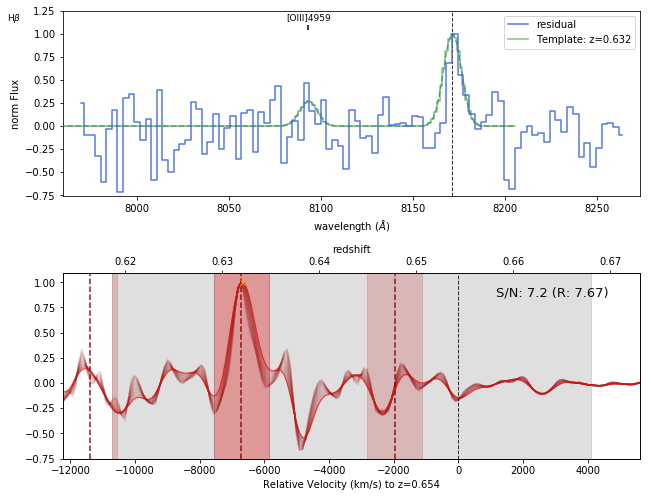

Best z: 0.6256708214306048 Best sigma: 1.328637577476951
SE Object #940  z: 0.626  Peak R: 2.722  Detction S/N: 7.560 Peak S/N: 7.560


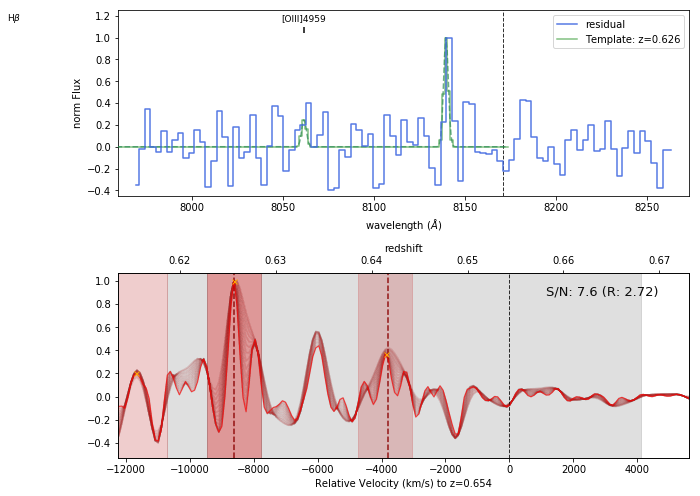

Best z: 0.6328991309554775 Best sigma: 4.3906802686624715
SE Object #1007  z: 0.633  Peak R: 8.995  Detction S/N: 6.107 Peak S/N: 6.107


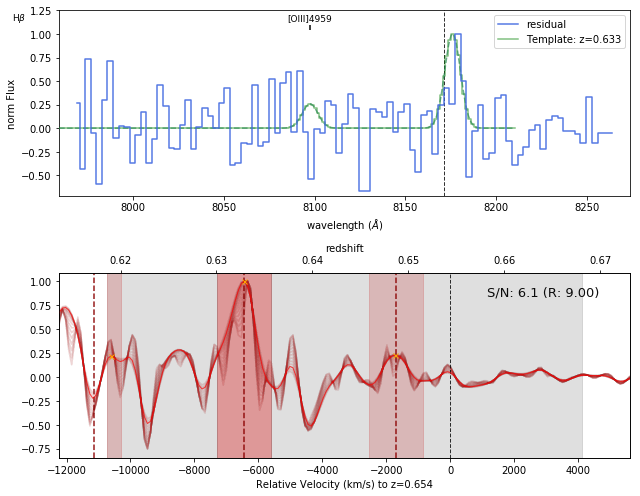

Best z: 0.6423768818313406 Best sigma: 3.369999371600631
SE Object #1057  z: 0.642  Peak R: 1.904  Detction S/N: 6.336 Peak S/N: 6.336


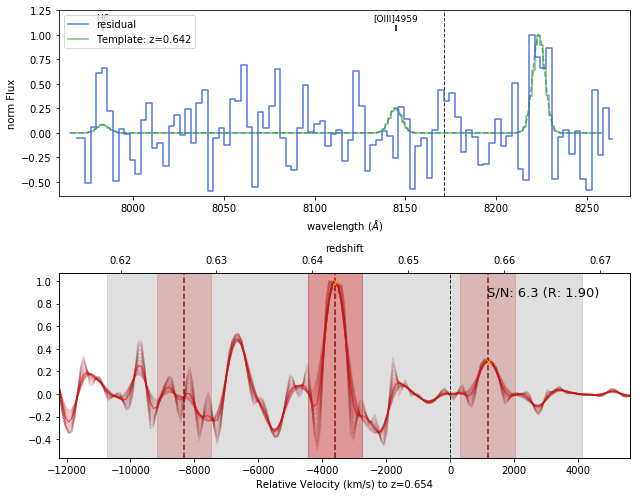

Best z: 0.6383078225984222 Best sigma: 1.328637577476951
SE Object #1071  z: 0.638  Peak R: 1.001  Detction S/N: 7.556 Peak S/N: 7.556


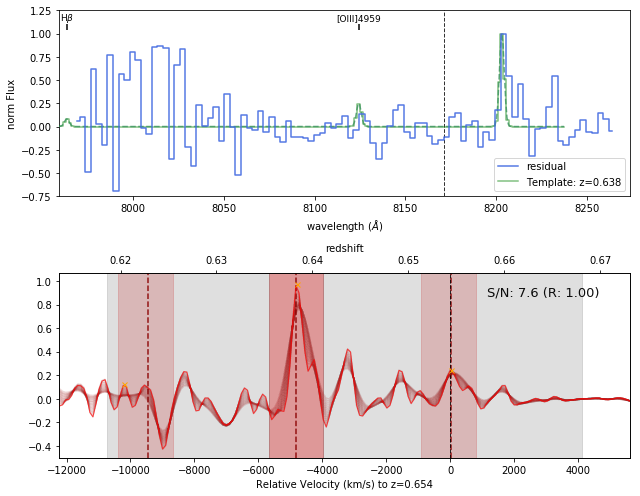

Best z: 0.619334142557682 Best sigma: 3.114829147335171
SE Object #1161  z: 0.619  Peak R: 3.354  Detction S/N: 6.373 Peak S/N: 6.373


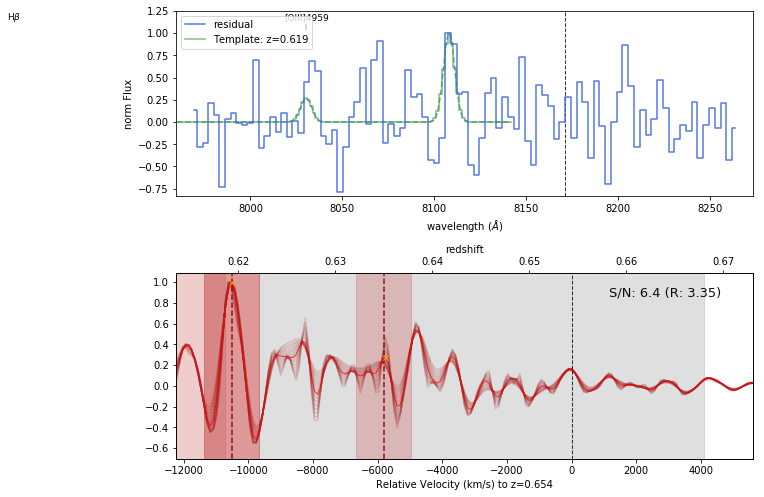

Best z: 0.628160255517546 Best sigma: 1.328637577476951
SE Object #1202  z: 0.628  Peak R: 2.474  Detction S/N: 6.713 Peak S/N: 6.713


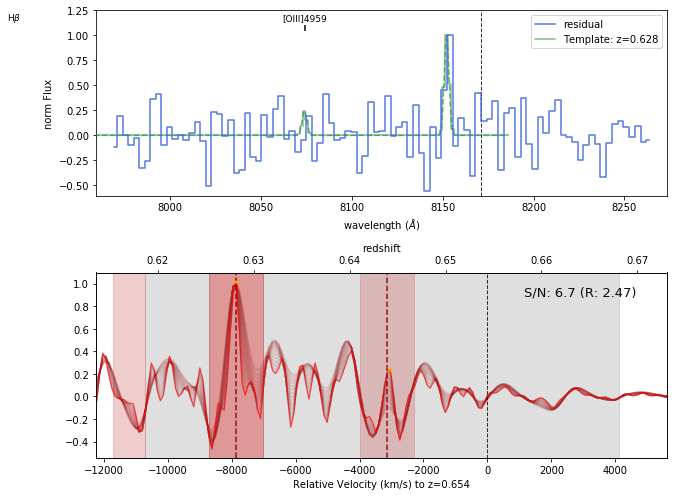

In [18]:
cond = cond_b
print(np.sum(cond))
for j, (cc_num) in enumerate(Datacube.cc_nums[cond]):
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num, 
                                                                             temp_type="Hb-OIII", temp_model="gauss")
#     plt.savefig("./A2465C/fig/xcorr_v2/SNb/CC#%d.png"%(cc_num), dpi=150)
    plt.show()
    plt.close()

In [33]:
#Composite 
import re
import glob
el_ls = glob.glob("./A2465C/fig/xcorr_v2/SNb/*.png")
for el in el_ls:
    img_cc = plt.imread(el)
    ind = re.compile(r'\d+').findall(el)[-1]
    img_confit = plt.imread("./A2465C/fig/fit_cont/SE#%s.png"%ind)
    img_spec = plt.imread("./A2465C/fig/spec/SE#%s.png"%ind)
    img_thumb = plt.imread("./A2465C/fig/img_thumb_v2/SE#%s.png"%ind)
    plt.figure(figsize=(16,12))
    ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
    ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
    ax1.imshow(img_confit)
    ax2.imshow(img_cc)
    ax3.imshow(img_spec)
    ax4.imshow(img_thumb)
    for ax in (ax1,ax2,ax3,ax4):
        ax.axis("off")
#     plt.suptitle("Flag: 1",fontsize=18)
    plt.tight_layout()
    plt.savefig("./A2465C/fig/candidate_v2/SNb/#EL-%s.png"%ind,dpi=150)
    plt.close()

## 5. Centroid Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip

import warnings
warnings.filterwarnings('ignore')
from pipeline import *
from utils import *
import glob
import re

Datacube = Read_Datacube("/home/qliu/data/A2465C_cube.fits", name="A2465C", z0=0.245, 
                         SE_catalog="./A2465C/SE/A2465C_run2.cat",
                         deep_frame='/home/qliu/data/A2465C_deep.fits')

Datacube.read_mask('/home/qliu/data/Raw_stack_A2465C_mask.fits')
Datacube.read_seg('./A2465C/SE/segment_run2.fits')
Datacube.read_spec('./A2465C/A2465C-spec_v2.fits')

Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.read_cc('./A2465C/A2465C-cc_Hb-OIII_gauss_v2.fits')
Datacube.read_cc('./A2465C/A2465C-cc_Ha-NII_gauss_v2.fits')

Datacube.read_cluster_boundary("./A2465C/A2465C_bound.fits")
id_BCG1 = np.argmin((Datacube.Tab_SE["X_IMAGE"]-707)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1385)**2)
id_BCG2 = np.argmin((Datacube.Tab_SE["X_IMAGE"]-1446)**2 + (Datacube.Tab_SE["Y_IMAGE"]-679)**2)


pos_BCG = Datacube.assign_BCG_position(id_BCG=[id_BCG1,id_BCG2])
print(id_BCG1,id_BCG2)

Template: Hb-OIII_gauss  Total Number: 120
Template: Ha-NII_gauss  Total Number: 300
Read cross-correlation result... Template:Hb-OIII_gauss
Read cross-correlation result... Template:Ha-NII_gauss
893 348


In [2]:
# SNa sample after a visual screen for strong lines
el_ls_v = glob.glob("./A2465C/fig/candidate_v2/visual/*.png")
Num_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_v]).astype("int"))
ind_v = Num_v-1
Num_v

array([  13,   15,   34,   76,   80,  134,  141,  151,  195,  216,  221,
        229,  240,  257,  259,  264,  274,  276,  301,  305,  313,  343,
        354,  364,  400,  423,  455,  468,  472,  475,  476,  479,  489,
        490,  499,  501,  503,  505,  512,  515,  517,  526,  533,  537,
        538,  541,  544,  548,  552,  555,  560,  564,  569,  577,  585,
        588,  589,  601,  602,  605,  609,  610,  620,  628,  647,  685,
        692,  709,  732,  736,  749,  752,  755,  756,  795,  908,  946,
        947,  966,  973, 1013, 1053, 1054, 1067, 1075, 1077, 1084, 1086,
       1100, 1104, 1110, 1129, 1136, 1140, 1150, 1151, 1158, 1163, 1191,
       1200, 1202])

In [3]:
Num_vp=Num_v[(Datacube.z_best[Num_v-1]<0.257) & (Datacube.z_best[Num_v-1]>0.233)]
Num_vp=Num_vp[(Num_vp!=893) &(Num_vp!=348)]
ind_v = Num_vp-1
Num_vp

array([  13,   15,   34,   76,   80,  134,  151,  195,  216,  221,  229,
        240,  257,  259,  264,  274,  276,  301,  305,  313,  343,  364,
        400,  423,  455,  472,  475,  476,  479,  489,  490,  499,  501,
        503,  505,  512,  515,  517,  526,  533,  537,  538,  541,  544,
        548,  552,  555,  560,  564,  569,  577,  585,  588,  589,  601,
        602,  605,  609,  610,  620,  628,  685,  692,  709,  732,  736,
        749,  752,  755,  756,  795,  908,  946,  947,  966,  973, 1013,
       1053, 1054, 1067, 1075, 1077, 1084, 1086, 1100, 1104, 1110, 1129,
       1136, 1140, 1158, 1163, 1191, 1200, 1202])

101
95


Text(0.5,0,'A2390 Candidate Redshift')

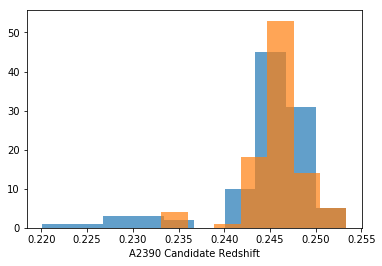

In [4]:
plt.hist(Datacube.z_best[Num_v-1],bins=10,alpha=0.7)
plt.hist(Datacube.z_best[Num_vp-1],bins=7,alpha=0.7)
print(len(Num_v))
print(len(Num_vp))
plt.xlabel("A2390 Candidate Redshift")

In [5]:
Datacube.pos_BCG

((705.994, 1385.4658), (1442.5652, 680.4546))

In [5]:
w = WCS(Datacube.hdu[0].header, naxis=2)
ra_BCG1, dec_BCG1 = w.all_pix2world(Datacube.pos_BCG[0][0], Datacube.pos_BCG[0][1], 1)
ra_BCG2, dec_BCG2 = w.all_pix2world(Datacube.pos_BCG[1][0], Datacube.pos_BCG[1][1], 1)
Datacube.assign_BCG_coordinate(((ra_BCG1,dec_BCG1),(ra_BCG2,dec_BCG2)))

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

optimal aperture:2.2

PA: 206.717,  Cluster-centric angle: 239.455


(32.73805346963957, 0.7647692921008936, 0.04172531781782905)

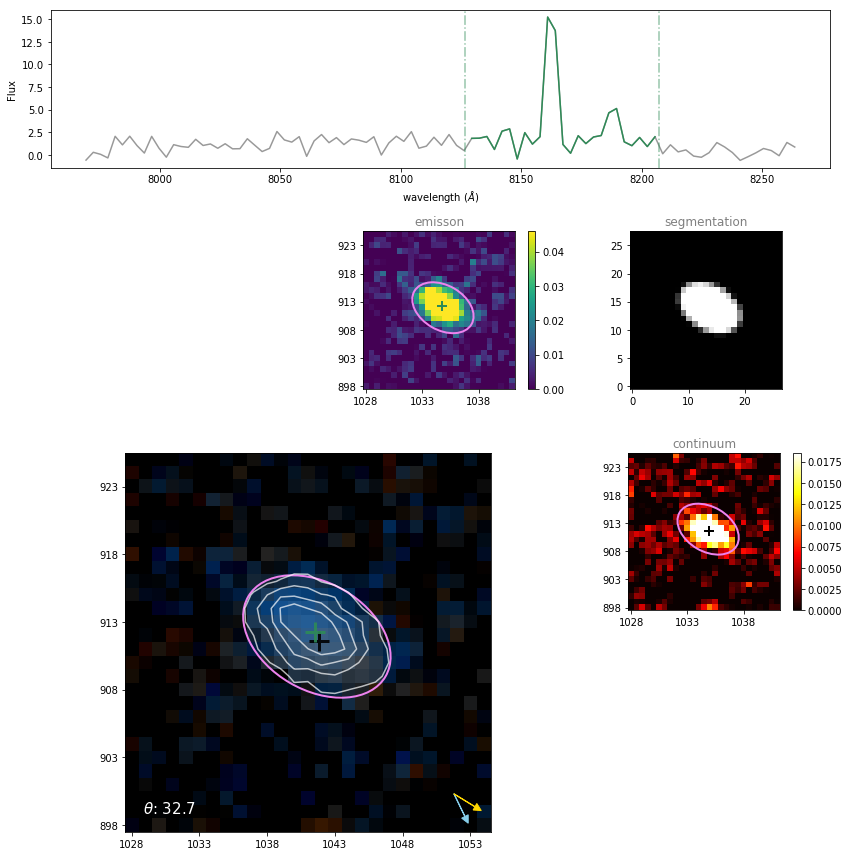

In [7]:
Datacube.centroid_analysis(num=560, centroid_type='APER')

optimal aperture:2.2
Aper (min,max): (1.54,2.20)


(31.737697465618112, 1.9535195857185694, 466.49423647262296)

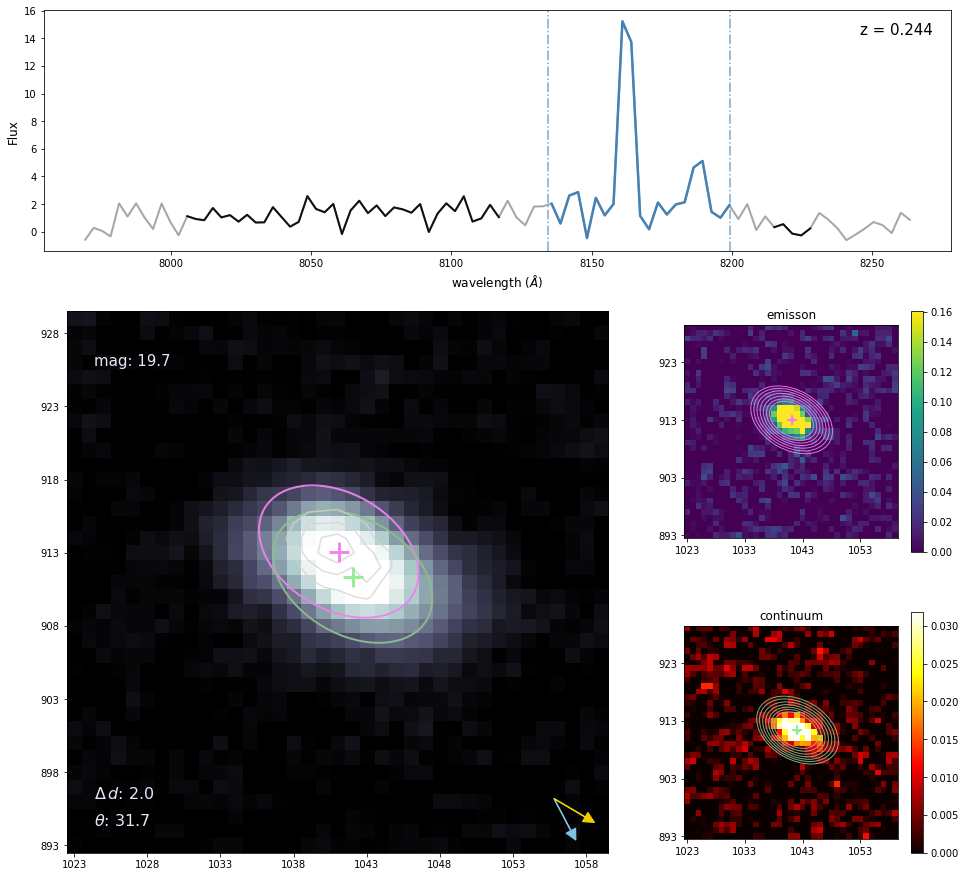

In [6]:
Datacube.centroid_analysis(num=560, centroid_type='APER')

optimal aperture:2.1
Aper (min,max): (1.47,2.10)


(39.88864685107245, 1.1292990594528942, 689.1566066329627)

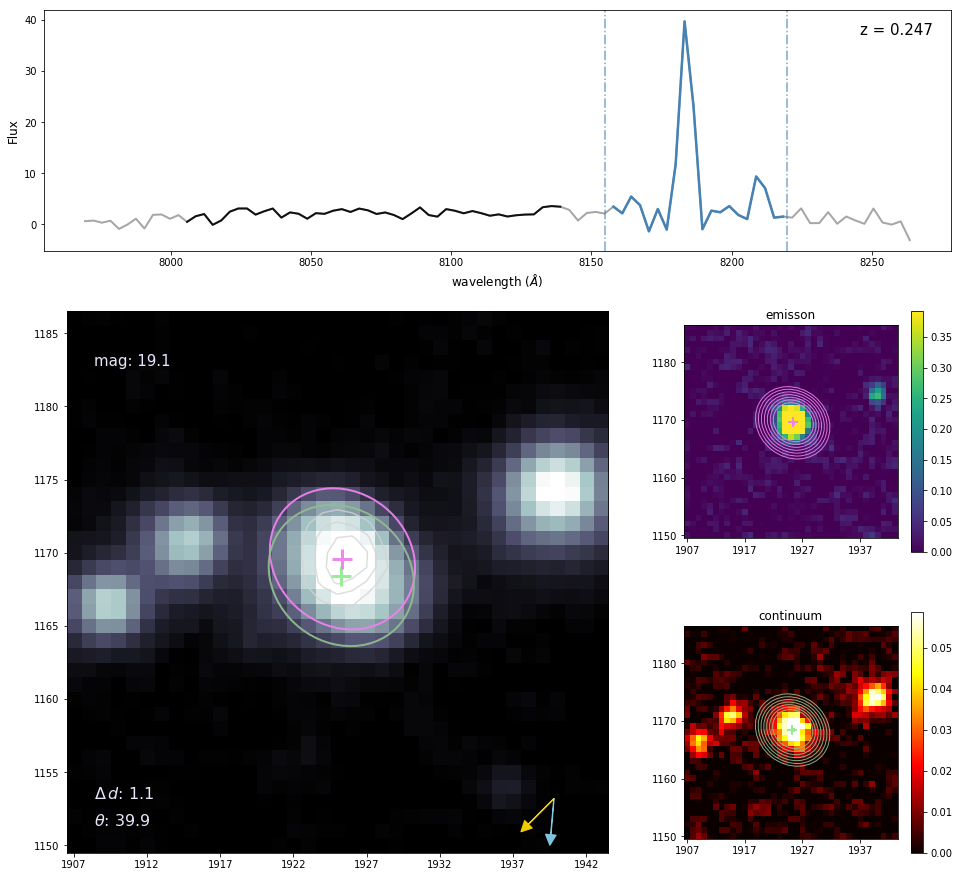

In [7]:
Datacube.centroid_analysis(num=1158, centroid_type='APER')

optimal aperture:2.1

PA: 164.396,  Cluster-centric angle: 135.131


(29.265752754828213, 1.01296051178383, 689.1566066329627)

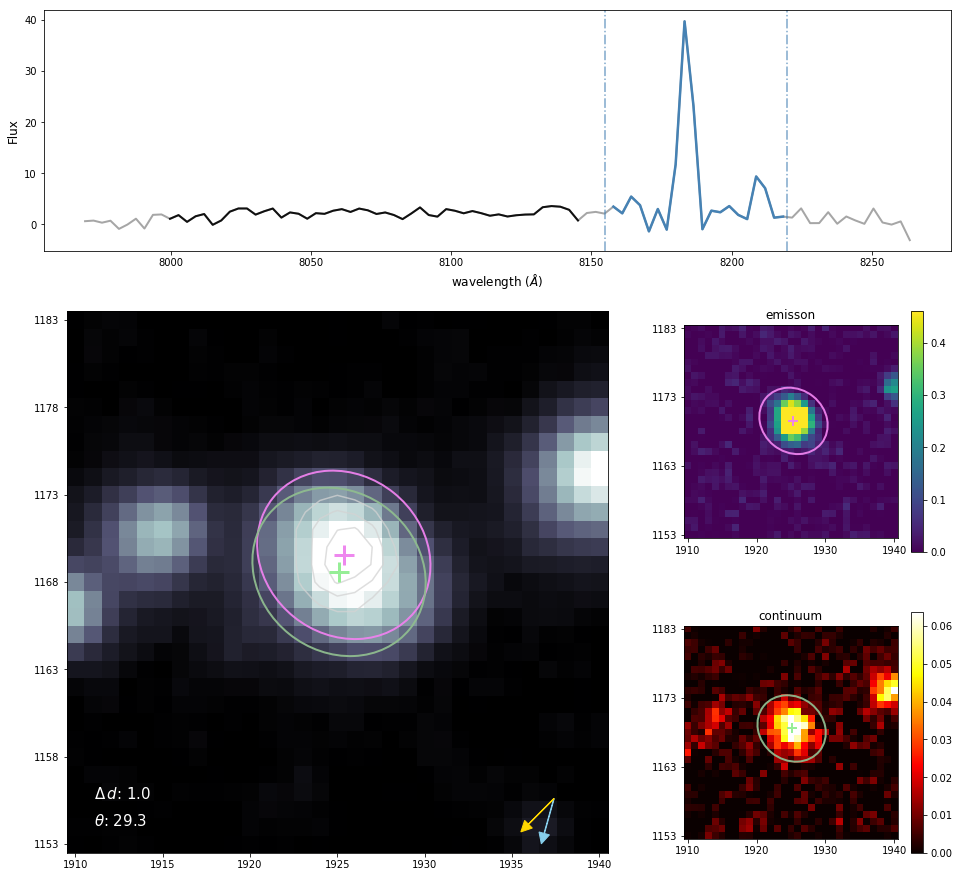

In [8]:
Datacube.centroid_analysis(num=1158, centroid_type='APER')

In [11]:
Datacube.centroid_analysis(num=973, centroid_type='APER')

optimal aperture:2.2
Aper (min,max): (1.54,2.20)


(nan, 0, nan)

In [12]:
Datacube.centroid_analysis_all(Num_v, centroid_type='APER')

Current Model:  Ha-NII_gauss
#EL-1
optimal aperture:2.6
#EL-2
optimal aperture:2.0
#EL-3
optimal aperture:1.9
#EL-4
optimal aperture:2.5
#EL-5
optimal aperture:3.4
Unable to compute centroid! Error raised.
#EL-6
optimal aperture:2.0
#EL-7
optimal aperture:2.6
#EL-8
optimal aperture:1.8
#EL-9
optimal aperture:3.9
#EL-10
optimal aperture:3.1
#EL-11
optimal aperture:2.4
#EL-12
optimal aperture:2.9
#EL-13
optimal aperture:1.3
Aper (min,max): (0.91,1.30)
#EL-14
optimal aperture:2.6
#EL-15
optimal aperture:1.8
Aper (min,max): (1.26,1.80)
#EL-16
optimal aperture:3.1
#EL-17
optimal aperture:2.2
#EL-18
optimal aperture:2.1
#EL-19
optimal aperture:1.6
#EL-20
optimal aperture:2.5
#EL-21
optimal aperture:2.9
#EL-22
optimal aperture:2.2
#EL-23
optimal aperture:1.8
#EL-24
optimal aperture:2.1
#EL-25
optimal aperture:1.6
#EL-26
optimal aperture:1.0
#EL-27
optimal aperture:2.1
#EL-28
optimal aperture:1.9
#EL-29
optimal aperture:1.9
#EL-30
optimal aperture:2.0
#EL-31
optimal aperture:2.0
#EL-32
optimal

#EL-275
optimal aperture:2.6
#EL-276
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-277
optimal aperture:3.0
#EL-278
optimal aperture:2.0
#EL-279
optimal aperture:1.8
#EL-280
optimal aperture:2.9
#EL-281
optimal aperture:1.8
#EL-282
optimal aperture:3.0
#EL-283
optimal aperture:1.9
#EL-284
optimal aperture:1.9
#EL-285
optimal aperture:2.7
#EL-286
optimal aperture:2.8
#EL-287
optimal aperture:2.1
#EL-288
optimal aperture:2.8
#EL-289
optimal aperture:2.0
#EL-290
optimal aperture:2.4
#EL-291
optimal aperture:2.9
#EL-292
optimal aperture:2.1
#EL-293
optimal aperture:1.8
#EL-294
optimal aperture:2.4
#EL-295
optimal aperture:2.5
#EL-296
optimal aperture:2.0
#EL-297
optimal aperture:2.0
#EL-298
optimal aperture:1.8
#EL-299
optimal aperture:1.6
#EL-300
optimal aperture:1.9
#EL-301
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-302
optimal aperture:1.9
#EL-303
optimal aperture:2.0
#EL-304
optimal aperture:2.1
#EL-305
optimal aperture:1.8
Aper (min,max): (1.26,1.80)
#EL-306
optimal a

#EL-534
optimal aperture:2.2
#EL-535
optimal aperture:3.6
#EL-536
optimal aperture:3.4
#EL-537
optimal aperture:2.0
Aper (min,max): (1.40,2.00)
#EL-538
optimal aperture:2.2
Aper (min,max): (1.54,2.20)
#EL-539
optimal aperture:2.2
#EL-540
optimal aperture:2.0
#EL-541
optimal aperture:2.0
Aper (min,max): (1.40,2.00)
#EL-542
optimal aperture:3.7
#EL-543
optimal aperture:2.6
#EL-544
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-545
optimal aperture:3.0
#EL-546
optimal aperture:3.3
#EL-547
optimal aperture:1.9
#EL-548
optimal aperture:2.3
Aper (min,max): (1.61,2.30)
#EL-549
optimal aperture:2.0
#EL-550
optimal aperture:2.7
#EL-551
optimal aperture:2.1
#EL-552
optimal aperture:2.3
Aper (min,max): (1.61,2.30)
#EL-553
optimal aperture:2.8
#EL-554
optimal aperture:2.3
#EL-555
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-556
optimal aperture:2.2
#EL-557
optimal aperture:2.1
#EL-558
optimal aperture:1.9
#EL-559
optimal aperture:2.2
#EL-560
optimal aperture:2.2
Aper (min,max): (1.54

#EL-796
optimal aperture:2.1
#EL-797
optimal aperture:2.9
#EL-798
optimal aperture:3.8
#EL-799
optimal aperture:1.6
#EL-800
optimal aperture:1.9
#EL-801
optimal aperture:2.0
#EL-802
optimal aperture:2.6
#EL-803
optimal aperture:3.1
#EL-804
optimal aperture:2.2
#EL-805
optimal aperture:3.4
#EL-806
optimal aperture:2.6
#EL-807
optimal aperture:3.3
#EL-808
optimal aperture:1.7
#EL-809
optimal aperture:2.0
#EL-810
optimal aperture:2.2
#EL-811
optimal aperture:2.6
#EL-812
optimal aperture:1.9
#EL-813
optimal aperture:1.5
#EL-814
optimal aperture:3.0
#EL-815
optimal aperture:1.8
#EL-816
optimal aperture:2.3
#EL-817
optimal aperture:2.2
#EL-818
optimal aperture:2.1
#EL-819
optimal aperture:2.2
#EL-820
optimal aperture:2.0
#EL-821
optimal aperture:2.2
#EL-822
optimal aperture:2.3
#EL-823
optimal aperture:2.1
#EL-824
optimal aperture:1.8
#EL-825
optimal aperture:2.0
#EL-826
optimal aperture:2.3
#EL-827
optimal aperture:1.9
#EL-828
optimal aperture:2.3
#EL-829
optimal aperture:3.1
#EL-830
optima

#EL-1068
optimal aperture:1.8
#EL-1069
optimal aperture:2.0
#EL-1070
optimal aperture:1.5
#EL-1071
optimal aperture:2.0
#EL-1072
optimal aperture:1.9
#EL-1073
optimal aperture:2.8
#EL-1074
optimal aperture:3.7
#EL-1075
optimal aperture:1.8
Aper (min,max): (1.26,1.80)
#EL-1076
optimal aperture:2.5
#EL-1077
optimal aperture:2.7
Aper (min,max): (1.89,2.70)
#EL-1078
optimal aperture:2.0
#EL-1079
optimal aperture:3.9
#EL-1080
optimal aperture:2.2
#EL-1081
optimal aperture:2.2
#EL-1082
optimal aperture:1.9
#EL-1083
optimal aperture:3.4
#EL-1084
optimal aperture:2.2
Aper (min,max): (1.54,2.20)
#EL-1085
optimal aperture:1.7
#EL-1086
optimal aperture:1.8
Aper (min,max): (1.26,1.80)
#EL-1087
optimal aperture:1.9
#EL-1088
optimal aperture:2.4
#EL-1089
optimal aperture:2.1
#EL-1090
optimal aperture:2.0
#EL-1091
optimal aperture:2.1
#EL-1092
optimal aperture:3.5
#EL-1093
optimal aperture:2.0
#EL-1094
optimal aperture:2.1
#EL-1095
optimal aperture:2.6
#EL-1096
optimal aperture:2.9
#EL-1097
optimal a

22.61089342403247


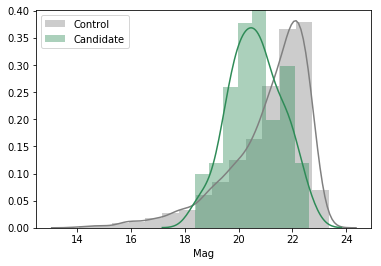

In [13]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

mag0 = 25.2
mag_all = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"]) + mag0
ind_notv = np.setdiff1d(Datacube.Tab_SE["NUMBER"]-1, ind_v)
mag_ctrl = pd.Series(mag_all[ind_notv]).dropna()
# mag_cut = (np.percentile(mag_no_nan, 2.5), np.percentile(mag_no_nan, 97.5))


sns.distplot(mag_ctrl,label="Control",color="gray",bins=15)
mag_el = pd.Series(mag_all[ind_v])
mag_cut = mag_el.max()
print (mag_cut)
sns.distplot(mag_el,label="Candidate",color="seagreen")
# plt.axvline(mag_cut[0],color='k',ls='--')
# plt.axvline(mag_cut[1],color='k',ls='--')
plt.xlabel("Mag")
plt.legend()

In [14]:
Datacube.construct_control(Num_v=Num_v, mag_cut=(mag_el.min(),mag_el.max()), dist_cut=50, bootstraped=False)

Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]
import warnings
warnings.filterwarnings('ignore')

Isophotal area threshold:  10.0
Distance to field edge threshold:  50
Control Sample : n=669


optimal aperture:1.3
Aper (min,max): (0.91,1.30)


FileNotFoundError: [Errno 2] No such file or directory: './A2465C/fig/centroid_maper_w_mean/#EL-13.png'

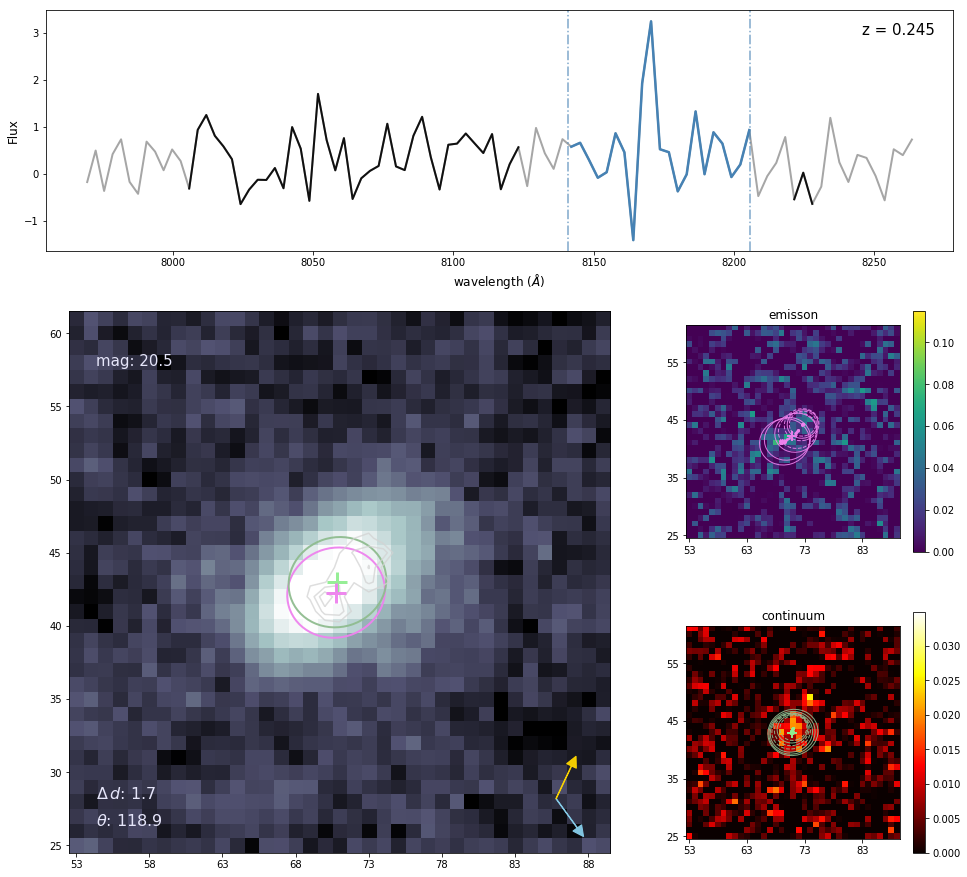

In [15]:
for num in Num_vp:
    Datacube.centroid_analysis(num=num, centroid_type='APER')
    plt.savefig("./A2465C/fig/centroid_maper_w_mean/#EL-%s"%num,dpi=150)
    plt.show()
    plt.close()

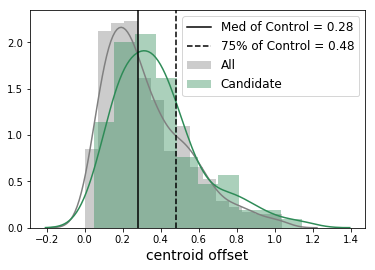

In [14]:
#ISO p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.75])

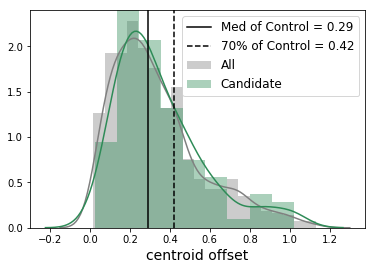

In [11]:
#APER p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.7])

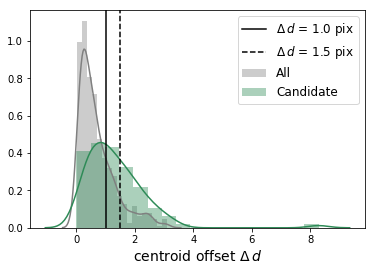

In [10]:
#APER p (2 aper)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[1.,1.5])

# of offset > 50% : 60
# of offset > 75% : 25


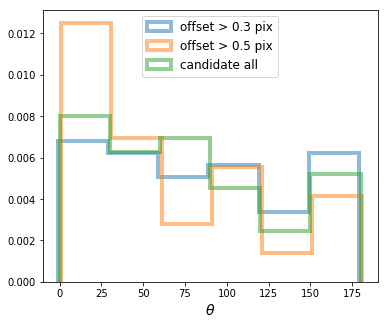

In [19]:
#ISO2
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 0.75], b=7)

# of offset > 50% : 60
# of offset > 100% : 27


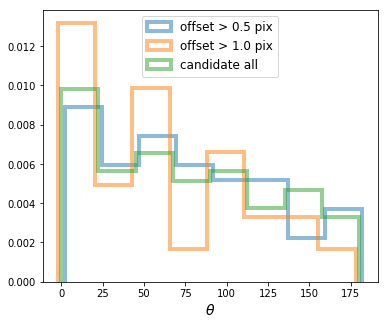

In [15]:
#APER p (1 aper)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[.5, 1.], b=9)

# of offset > 100% : 56
# of offset > 150% : 36


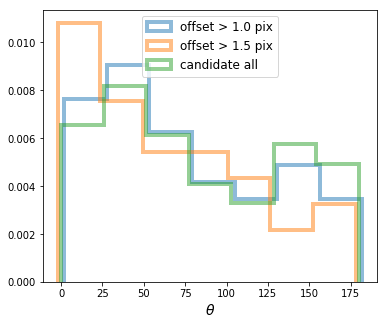

In [12]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[1, 1.5], b=8)

# of offset > 50% : 71
# of offset > 100% : 37


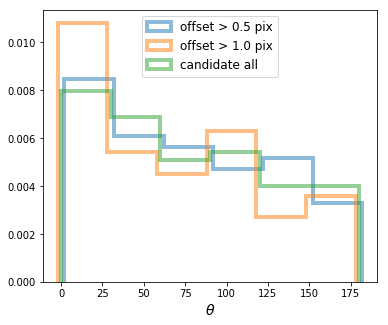

In [19]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
cond = (Datacube.diff_centroids_v<10) & (mag_all[ind_v]<22.7)
draw_angle_candidate(Datacube.diff_angles_v[cond], Datacube.diff_centroids_v[cond], 
                     Datacube.diff_centroids_c, crit=[0.5, 1.], b=7)

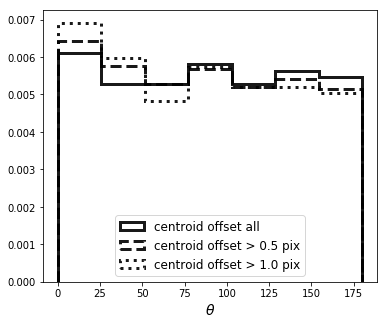

In [20]:
#APER (2aper)
plt.figure(figsize=(6,5))
draw_angle_control(Datacube.diff_angles_c,Datacube.diff_centroids_c, crit=[0.15,0.25],b=8)

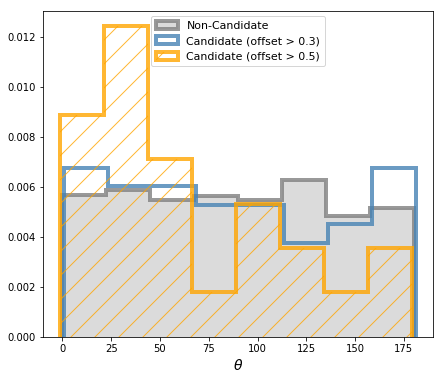

In [25]:
#ISO
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[0.5,0.75], b=9)

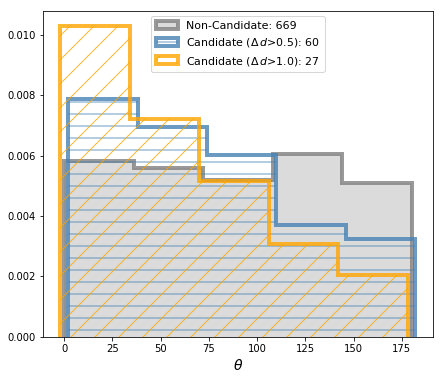

In [18]:
#APER p (1 aper)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[.5,1.], b=6)

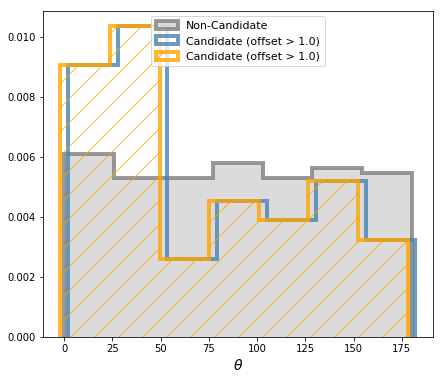

In [22]:
#APER p (distortion corrected)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[0.25,0.25], b=8)

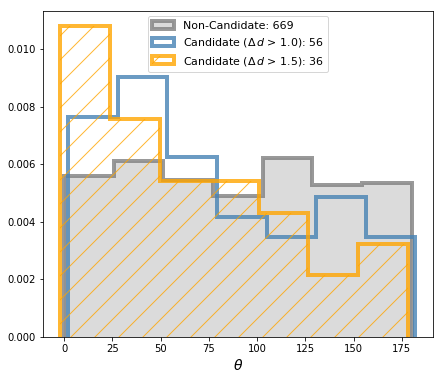

In [20]:
#APER p (2 aper)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[1.,1.5], b=8)
plt.savefig("/home/qliu/Pictures/20190312/A2465C.pdf",dpi=100)

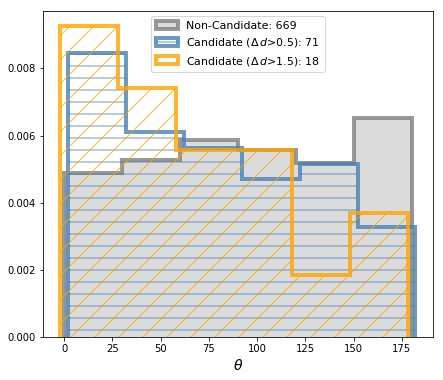

In [31]:
#APER p (2 aper)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[.5,1.5], b=7)

In [28]:
#1 APER 
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
p = 0.5
q = 1.
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.074
K-S: p-value=0.007
Anderson_ksampResult(statistic=1.9599373039576897, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.049945628692475874)
Anderson_ksampResult(statistic=3.580603663399719, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.011613706186783448)


In [20]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#2 APER 
p = 0.5
q = 1.5
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.085
K-S: p-value=0.139
Anderson_ksampResult(statistic=3.6921581607841505, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.01055568580629396)
Anderson_ksampResult(statistic=1.4119620629934557, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0842866325507906)


In [24]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#2 APER 
p = 0.5
q = 1.5
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.042
K-S: p-value=0.224
Anderson_ksampResult(statistic=2.5039289505784157, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.030158802009343462)
Anderson_ksampResult(statistic=0.9639748717241504, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1307535658305824)


In [27]:
import pandas as pd
df = pd.DataFrame({"diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                 "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                 "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
df.to_csv('./A2465C/centroid_analysis_A2465C_iso.csv',sep=',',index=None)

In [17]:
import pandas as pd
coords = w.pixel_to_world(Datacube.Tab_SE["X_IMAGE"], Datacube.Tab_SE["Y_IMAGE"])
ind_v = Num_v-1
Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]

ind_c = Datacube.Num_c-1

inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

df = pd.DataFrame({"ID":np.concatenate([ind_v + 1, Datacube.Num_c]),
                   "ra":np.concatenate([coords.ra[ind_v], coords.ra[ind_c]]),
                   "dec":np.concatenate([coords.dec[ind_v], coords.dec[ind_c]]),
                   "redshift":np.concatenate([Datacube.z_best[ind_v], Datacube.z_best[ind_c]]),
                   "SNR_Ha": np.concatenate([SNR_best_Ha[ind_v], SNR_best_Ha[ind_c]]),
                   "SNR_OIII": np.concatenate([SNR_best_Hb[ind_v], SNR_best_Hb[ind_c]]),
                   "mag_auto": np.concatenate([mag_all[ind_v], mag_all[ind_c]]),
                   "R_petro": np.concatenate([Datacube.Tab_SE['PETRO_RADIUS'][ind_v], Datacube.Tab_SE['PETRO_RADIUS'][ind_c]]),
                   "dist_edge": np.concatenate([Datacube.dist_edge[ind_v], Datacube.dist_edge[ind_c]]),
                   "diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                   "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                   "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
# df.to_csv('./A2465C/centroid_analysis_A2465C_2aper_all_weight_med.csv',sep=',',index=None)

In [22]:
ind_v = Num_vp-1
SNR_best_Ha[ind_v]-SNR_best_Hb[ind_v]

array([-3.74238246e+00,  6.47383474e-01, -6.97348800e+00, -7.41700451e+00,
        5.63507430e+00,  2.58628899e+00, -1.82808162e+00, -1.65004512e+00,
        1.57291922e+01, -5.92117425e-01, -5.65095496e+00,  1.26001077e-01,
       -4.88756860e+00,  1.72323778e+00,  1.08884172e-02,  1.62278200e+00,
       -3.76739075e-01,  4.10007757e+00, -1.13951196e+00, -1.06390055e+00,
        2.56254521e+00,  7.40259106e+00,  3.76707181e+00,  5.51839416e+00,
       -3.18297956e-01,  5.66993797e-01,  3.04893211e+00,  7.51819803e+00,
        1.94735529e+00, -1.33330399e+00,  6.52549016e+00, -2.44192768e+00,
       -2.46515665e+00, -4.85344937e+00,  1.04526403e+00, -1.71025357e+00,
        1.14777712e+01, -7.27383712e-01, -8.16138330e-01, -1.59529119e+00,
       -9.09145011e-01,  5.43806685e+00,  2.15089001e+00,  1.11710901e+01,
       -1.16939018e+00,  1.55297442e+00,  5.07189315e+00,  1.35471247e+01,
        1.34674906e+01, -5.54516246e+00,  3.78484117e+00, -1.63915350e+00,
       -1.50032265e+00, -

Best z: 0.24479963763117768 Best sigma: 1.328637577476951
SE Object #13  z: 0.245  Peak R: 4.347  Detction S/N: 5.781 Peak S/N: 6.162


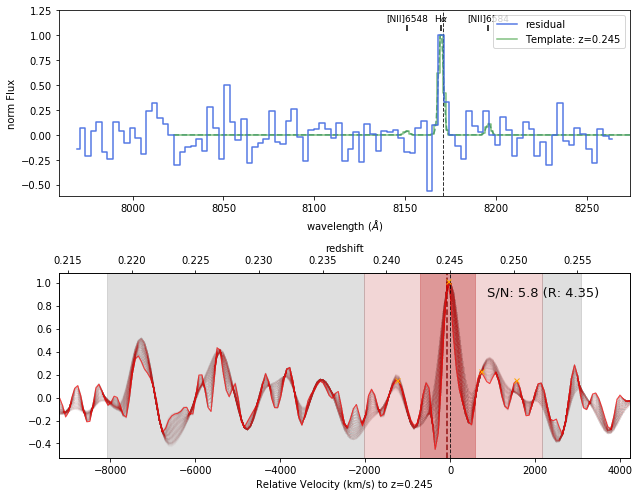

In [29]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(13, temp_type="Ha-NII", temp_model="gauss")

Best z: 0.6313574719561227 Best sigma: 1.583807801742411
SE Object #13  z: 0.631  Peak R: 5.541  Detction S/N: 9.523 Peak S/N: 9.523


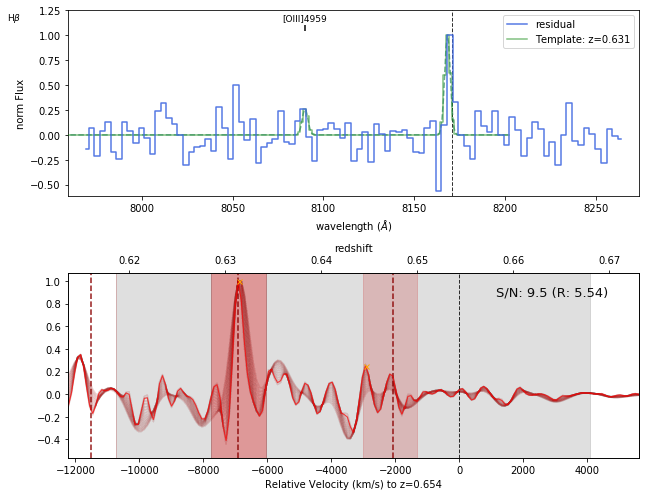

In [30]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(13, temp_type="Hb-OIII", temp_model="gauss")

In [28]:
for d,a,b in zip(Num_vp,SNR_best_Ha[ind_v],SNR_best_Hb[ind_v]):
    print("Num:%d   S/N Ha: %.2f   S/N Ha-Hb:%.1f"%(d,a,a-b))

Num:13   S/N Ha: 5.78   S/N Ha-Hb:-3.7
Num:15   S/N Ha: 11.12   S/N Ha-Hb:0.6
Num:34   S/N Ha: 8.07   S/N Ha-Hb:-7.0
Num:76   S/N Ha: 11.46   S/N Ha-Hb:-7.4
Num:80   S/N Ha: 11.16   S/N Ha-Hb:5.6
Num:134   S/N Ha: 27.91   S/N Ha-Hb:2.6
Num:151   S/N Ha: 12.16   S/N Ha-Hb:-1.8
Num:195   S/N Ha: 16.15   S/N Ha-Hb:-1.7
Num:216   S/N Ha: 21.11   S/N Ha-Hb:15.7
Num:221   S/N Ha: 8.39   S/N Ha-Hb:-0.6
Num:229   S/N Ha: 15.68   S/N Ha-Hb:-5.7
Num:240   S/N Ha: 10.27   S/N Ha-Hb:0.1
Num:257   S/N Ha: 5.23   S/N Ha-Hb:-4.9
Num:259   S/N Ha: 14.85   S/N Ha-Hb:1.7
Num:264   S/N Ha: 6.68   S/N Ha-Hb:0.0
Num:274   S/N Ha: 7.18   S/N Ha-Hb:1.6
Num:276   S/N Ha: 8.57   S/N Ha-Hb:-0.4
Num:301   S/N Ha: 13.06   S/N Ha-Hb:4.1
Num:305   S/N Ha: 14.66   S/N Ha-Hb:-1.1
Num:313   S/N Ha: 7.83   S/N Ha-Hb:-1.1
Num:343   S/N Ha: 9.97   S/N Ha-Hb:2.6
Num:364   S/N Ha: 25.19   S/N Ha-Hb:7.4
Num:400   S/N Ha: 17.22   S/N Ha-Hb:3.8
Num:423   S/N Ha: 22.41   S/N Ha-Hb:5.5
Num:455   S/N Ha: 6.93   S/N Ha-Hb:-0.3
Nu

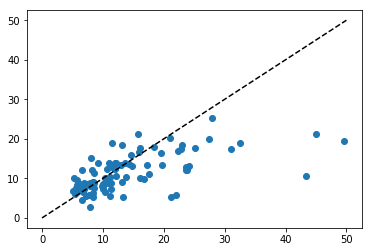

In [41]:
plt.scatter(SNR_best_Ha[ind_v], SNR_best_Hb[ind_v])
xx=np.linspace(0,50)
plt.plot(xx,xx,"k--")

In [20]:
coords = w.pixel_to_world(Datacube.Tab_SE["X_IMAGE"], Datacube.Tab_SE["Y_IMAGE"])
ind_v = Num_v-1
Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]

ind_c = Datacube.Num_c-1

inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

df = pd.DataFrame({"ID":np.concatenate([ind_v + 1, Datacube.Num_c]),
                   "ra":np.concatenate([coords.ra[ind_v], coords.ra[ind_c]]),
                   "dec":np.concatenate([coords.dec[ind_v], coords.dec[ind_c]]),
                   "redshift":np.concatenate([Datacube.z_best[ind_v], Datacube.z_best[ind_c]]),
                   "SNR_Ha": np.concatenate([SNR_best_Ha[ind_v], SNR_best_Ha[ind_c]]),
                   "SNR_OIII": np.concatenate([SNR_best_Hb[ind_v], SNR_best_Hb[ind_c]]),
                   "mag_auto": np.concatenate([mag_all[ind_v], mag_all[ind_c]]),
                   "R_petro": np.concatenate([Datacube.Tab_SE['PETRO_RADIUS'][ind_v], Datacube.Tab_SE['PETRO_RADIUS'][ind_c]]),
                   "dist_edge": np.concatenate([Datacube.dist_edge[ind_v], Datacube.dist_edge[ind_c]]),
                   "diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                   "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                   "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
